In [1]:
%load_ext autoreload

import os, sys
sys.path.insert(0, "../")

%autoreload 2
from flowset import *

import polars as pl

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


In [2]:
def download_and_unzip(download_url_link, dir_path, zipped_filename,destination_dir_name):
    #https://www.tutorialsbuddy.com/download-and-unzip-a-zipped-file-in-python
    print("Download starting")
    urllib.request.urlretrieve(
        download_url_link, os.path.join(dir_path, zipped_filename)
    )
    print("Download complete")

    print("unzipping file starting")
    with zipfile.ZipFile(os.path.join(dir_path, zipped_filename), "r") as zip_file:
        zip_file.extractall(os.path.join(dir_path, destination_dir_name))
    print("unzipping complete")


if not os.path.exists("ReactomePathways.gmt"):
    download_and_unzip("https://reactome.org/download/current/ReactomePathways.gmt.zip", ".", "ReactomePathways.gmt.zip", ".")

In [3]:
exprData = pl.read_csv("sccovid_data/expression.mono.asympt.tsv", has_header=True, separator="\t", null_values=["NA"])
exprData = exprData.filter( pl.col("cluster") != "cluster.0")
print(exprData)

#print(exprData.select("cluster").unique())

shape: (40_795, 13)
┌───────────┬────────────┬───────────┬────────────┬───┬────────────┬──────────┬────────────┬────────────┐
│ cluster   ┆ count_expr ┆ min.clust ┆ lower_hing ┆ … ┆ count_all. ┆ gene     ┆ not_expr.c ┆ expr.clust │
│ ---       ┆ .cluster   ┆ er        ┆ e.cluster  ┆   ┆ cluster    ┆ ---      ┆ luster     ┆ er         │
│ str       ┆ ---        ┆ ---       ┆ ---        ┆   ┆ ---        ┆ str      ┆ ---        ┆ ---        │
│           ┆ i64        ┆ f64       ┆ f64        ┆   ┆ i64        ┆          ┆ f64        ┆ f64        │
╞═══════════╪════════════╪═══════════╪════════════╪═══╪════════════╪══════════╪════════════╪════════════╡
│ cluster.1 ┆ 33         ┆ 0.520254  ┆ 0.741529   ┆ … ┆ 131        ┆ HES4     ┆ 0.748092   ┆ 0.251908   │
│ cluster.1 ┆ 118        ┆ 0.520891  ┆ 2.091211   ┆ … ┆ 131        ┆ ISG15    ┆ 0.099237   ┆ 0.900763   │
│ cluster.1 ┆ 17         ┆ 0.447013  ┆ 0.644771   ┆ … ┆ 131        ┆ AGRN     ┆ 0.870229   ┆ 0.129771   │
│ cluster.1 ┆ 55         ┆

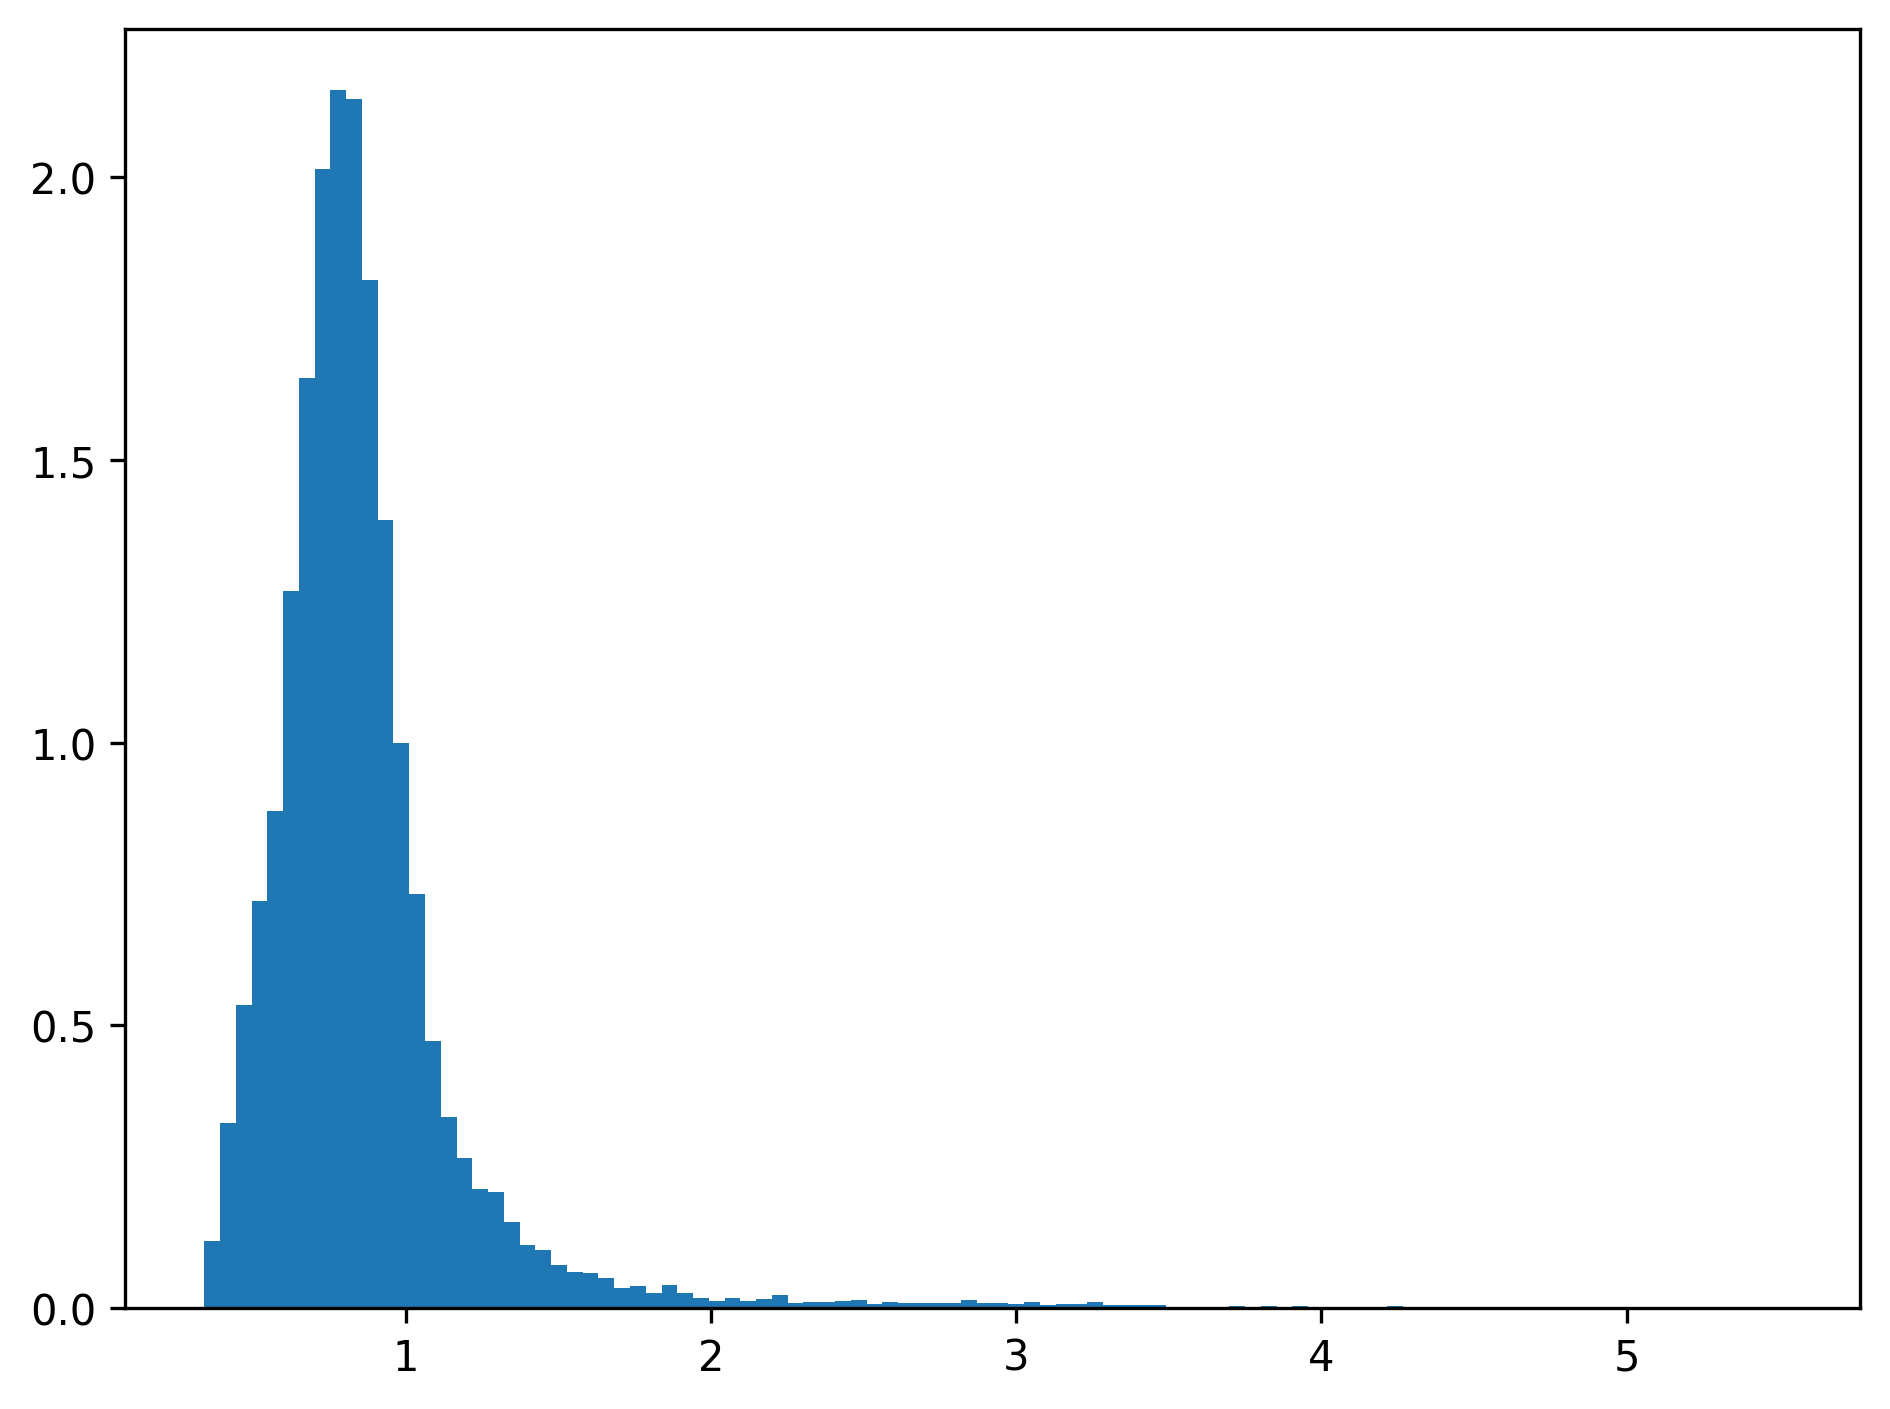

In [4]:
def pl_hist(df, column, n_bins=100,):
    data = df.select(pl.col(column))
    
    fig, ax = plt.subplots(1, 1, tight_layout=True)
    ax.hist(data, bins=n_bins, density=True)
    
    plt.show()
    plt.close()
    
pl_hist(exprData, "mean.cluster")

{'seriesOrder': ['cluster.1', 'cluster.2', 'cluster.3']}
-1.0 9.0
centers [0.4, 0.8, 1.2, 1.6, 2, 2.4]
Creating Universe Range -1.0 -> 9.0 with step size 0.1
Mean Expr mean.cluster col 7
Expr Count expr.cluster col 12
SD sd.cluster col 8
Cluster cluster col 0
Combining over state:  False


/mnt/raidbio/extproj/projekte/FlowSets/examples/../flowset.py:656: RuntimeWarning: invalid value encountered in divide
  values = fuzz.trimf(self.universe, abc)/unscaledValues


to_homogeneous: cluster.2
to_homogeneous: cluster.1
to_homogeneous: cluster.3


shape: (16_585, 19)
┌───┬────────────┬────────────┬────────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ g ┆ HIGH.clust ┆ LMED.clust ┆ LOW.cluste ┆ … ┆ LOW.cluste ┆ MED.cluste ┆ MHIGH.clus ┆ NO.cluster │
│ e ┆ er.2       ┆ er.2       ┆ r.2        ┆   ┆ r.3        ┆ r.3        ┆ ter.3      ┆ .3         │
│ n ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ e ┆ f64        ┆ f64        ┆ f64        ┆   ┆ f64        ┆ f64        ┆ f64        ┆ f64        │
│ - ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ - ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ - ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ s ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ t ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ r ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
╞═══╪════════════╪════════════╪════════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ I ┆ 0.032223   ┆ 0.149937   ┆ 0.118563   ┆ … ┆ 0.162277   ┆ 0.025602   ┆ 0.003789   ┆ 0.677618   │
│ S ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ G ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ 1 ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ 5 ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ U ┆ 0.0        ┆ 0.050726   ┆ 0.142472   ┆ … ┆ 0.155125   ┆ 0.024098   ┆ 0.002414   ┆ 0.709653   │
│ B ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ E ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ 2 ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ J ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ 2 ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ A ┆ 0.0        ┆ 0.024095   ┆ 0.040646   ┆ … ┆ 0.047751   ┆ 0.0        ┆ 0.0        ┆ 0.950058   │
│ T ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ A ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ D ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ 3 ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ B ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ G ┆ 0.006881   ┆ 0.332555   ┆ 0.156669   ┆ … ┆ 0.226888   ┆ 0.152026   ┆ 0.052242   ┆ 0.311524   │
│ N ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ B ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ 1 ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ … ┆ …          ┆ …          ┆ …          ┆ … ┆ …          ┆ …          ┆ …          ┆ …          │
│ A ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ … ┆ 0.008568   ┆ 0.0        ┆ 0.0        ┆ 0.991432   │
│ P ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ 0 ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ 0 ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ 3 ┆            ┆            ┆            ┆   ┆            ┆            ┆            ┆            │
│ 3 ┆            ┆            ┆          

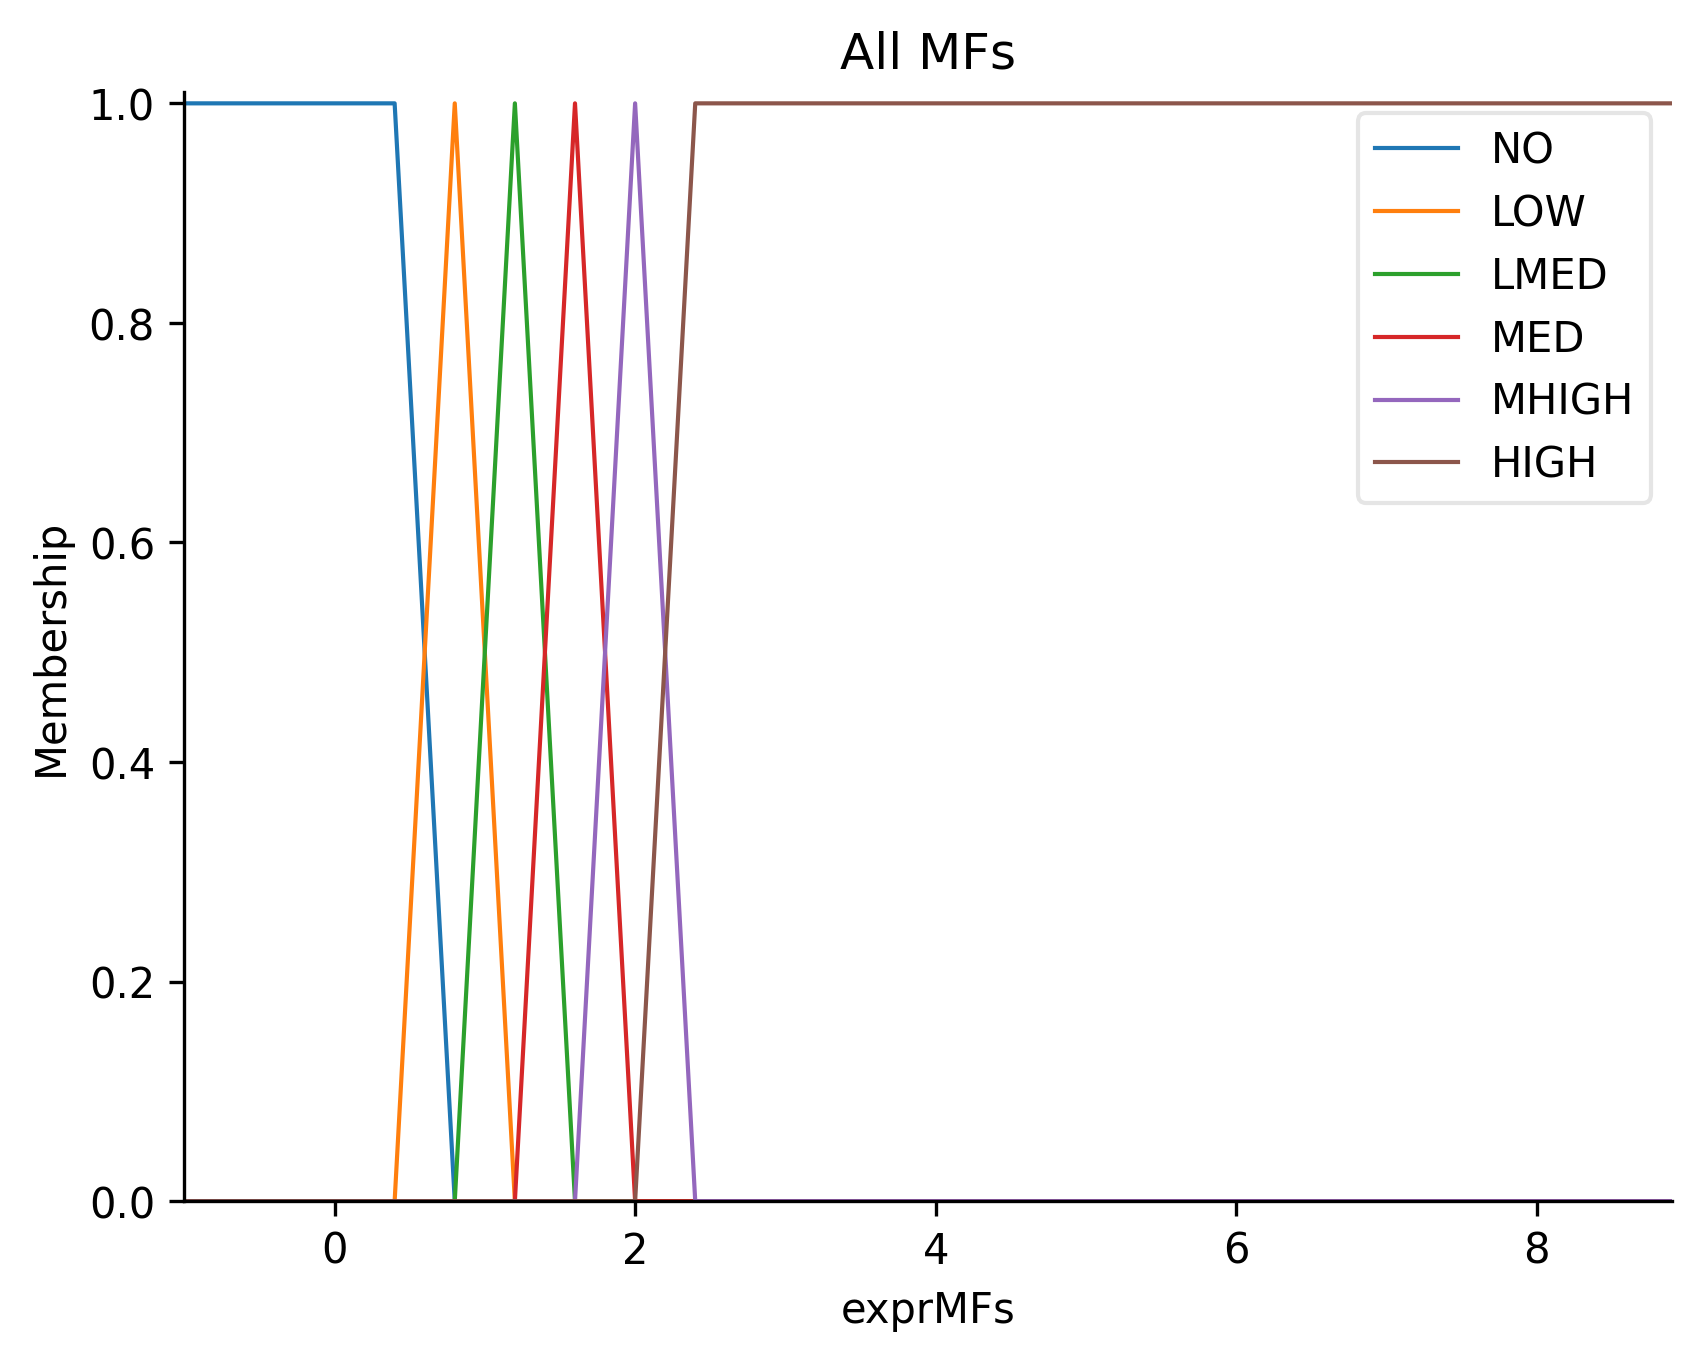

In [24]:
explDFRaw, mfFuzzy = FlowAnalysis.fuzzify_exprvalues(exprData, stepsize=0.1, seriesOrder=["cluster.1","cluster.2","cluster.3"], mfLevels = ["NO","LOW","LMED","MED", "MHIGH", "HIGH"], centers=[0.4, 0.8, 1.2, 1.6, 2, 2.4]) #"cluster.thrombus"
explDFWide = FlowAnalysis.to_vwide(explDFRaw, mfFuzzy)
explDFWide

In [25]:
isgListLong = sorted(set(["MX1","MX2","MT2A","RSAD2","SIGLEC1","IFIT1","IFI44","IFI27","IFITM10","IFIT3","IFI6","IFIT1P1","IFIT2","IFITM9P","IFI30","IFITM3","IFI44L","IFIT1B","IFITM5","IFITM3P2","IFITM3P9","IFI27L2","IFIT5","IFITM1","IFIH1","IFI16","IFI35","IFI27L1","IRF6","IRF7","IRF9","IRF5","IRF4","IRF2BP2","IRF2BPL","IRF3","IRF1-AS1","ISG15","ISG20L2","ISG20","XAF1","LY6E","IFITM2","IFITM3P6","IFITM3P3","IFIT6P","IRF2BP1","IRF5P1","IRF2","IRF1","IRF8","IFITM3P7","IFITM4P","IFITM3P1","IFITM3P8"]))
isgListShort = sorted(set(["MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27",  "IFI44L", "RSAD2", "SIGLEC1", "IFIT1"]))

In [26]:
fa = FlowAnalysis(explDFWide, "gene", (  ("1", "TP 1"),("2", "TP 2"),("3", "TP 3")), mfFuzzy, sep=".cluster.") #("thrombus", "Thrombus"),

In [27]:
import seaborn as sns

scm = fa._create_series_color_map(None, "scaling")
icefires = sns.color_palette("icefire", len(scm)+2)

sc = {x: scm[x](1.0) for xi, x in enumerate(scm)}
#sc = {x: icefires[xi+1] for xi, x in enumerate(scm)}
sc


{'TP 1': (0.267004, 0.004874, 0.329415, 1.0),
 'TP 2': (0.190631, 0.407061, 0.556089, 1.0),
 'TP 3': (0.20803, 0.718701, 0.472873, 1.0)}

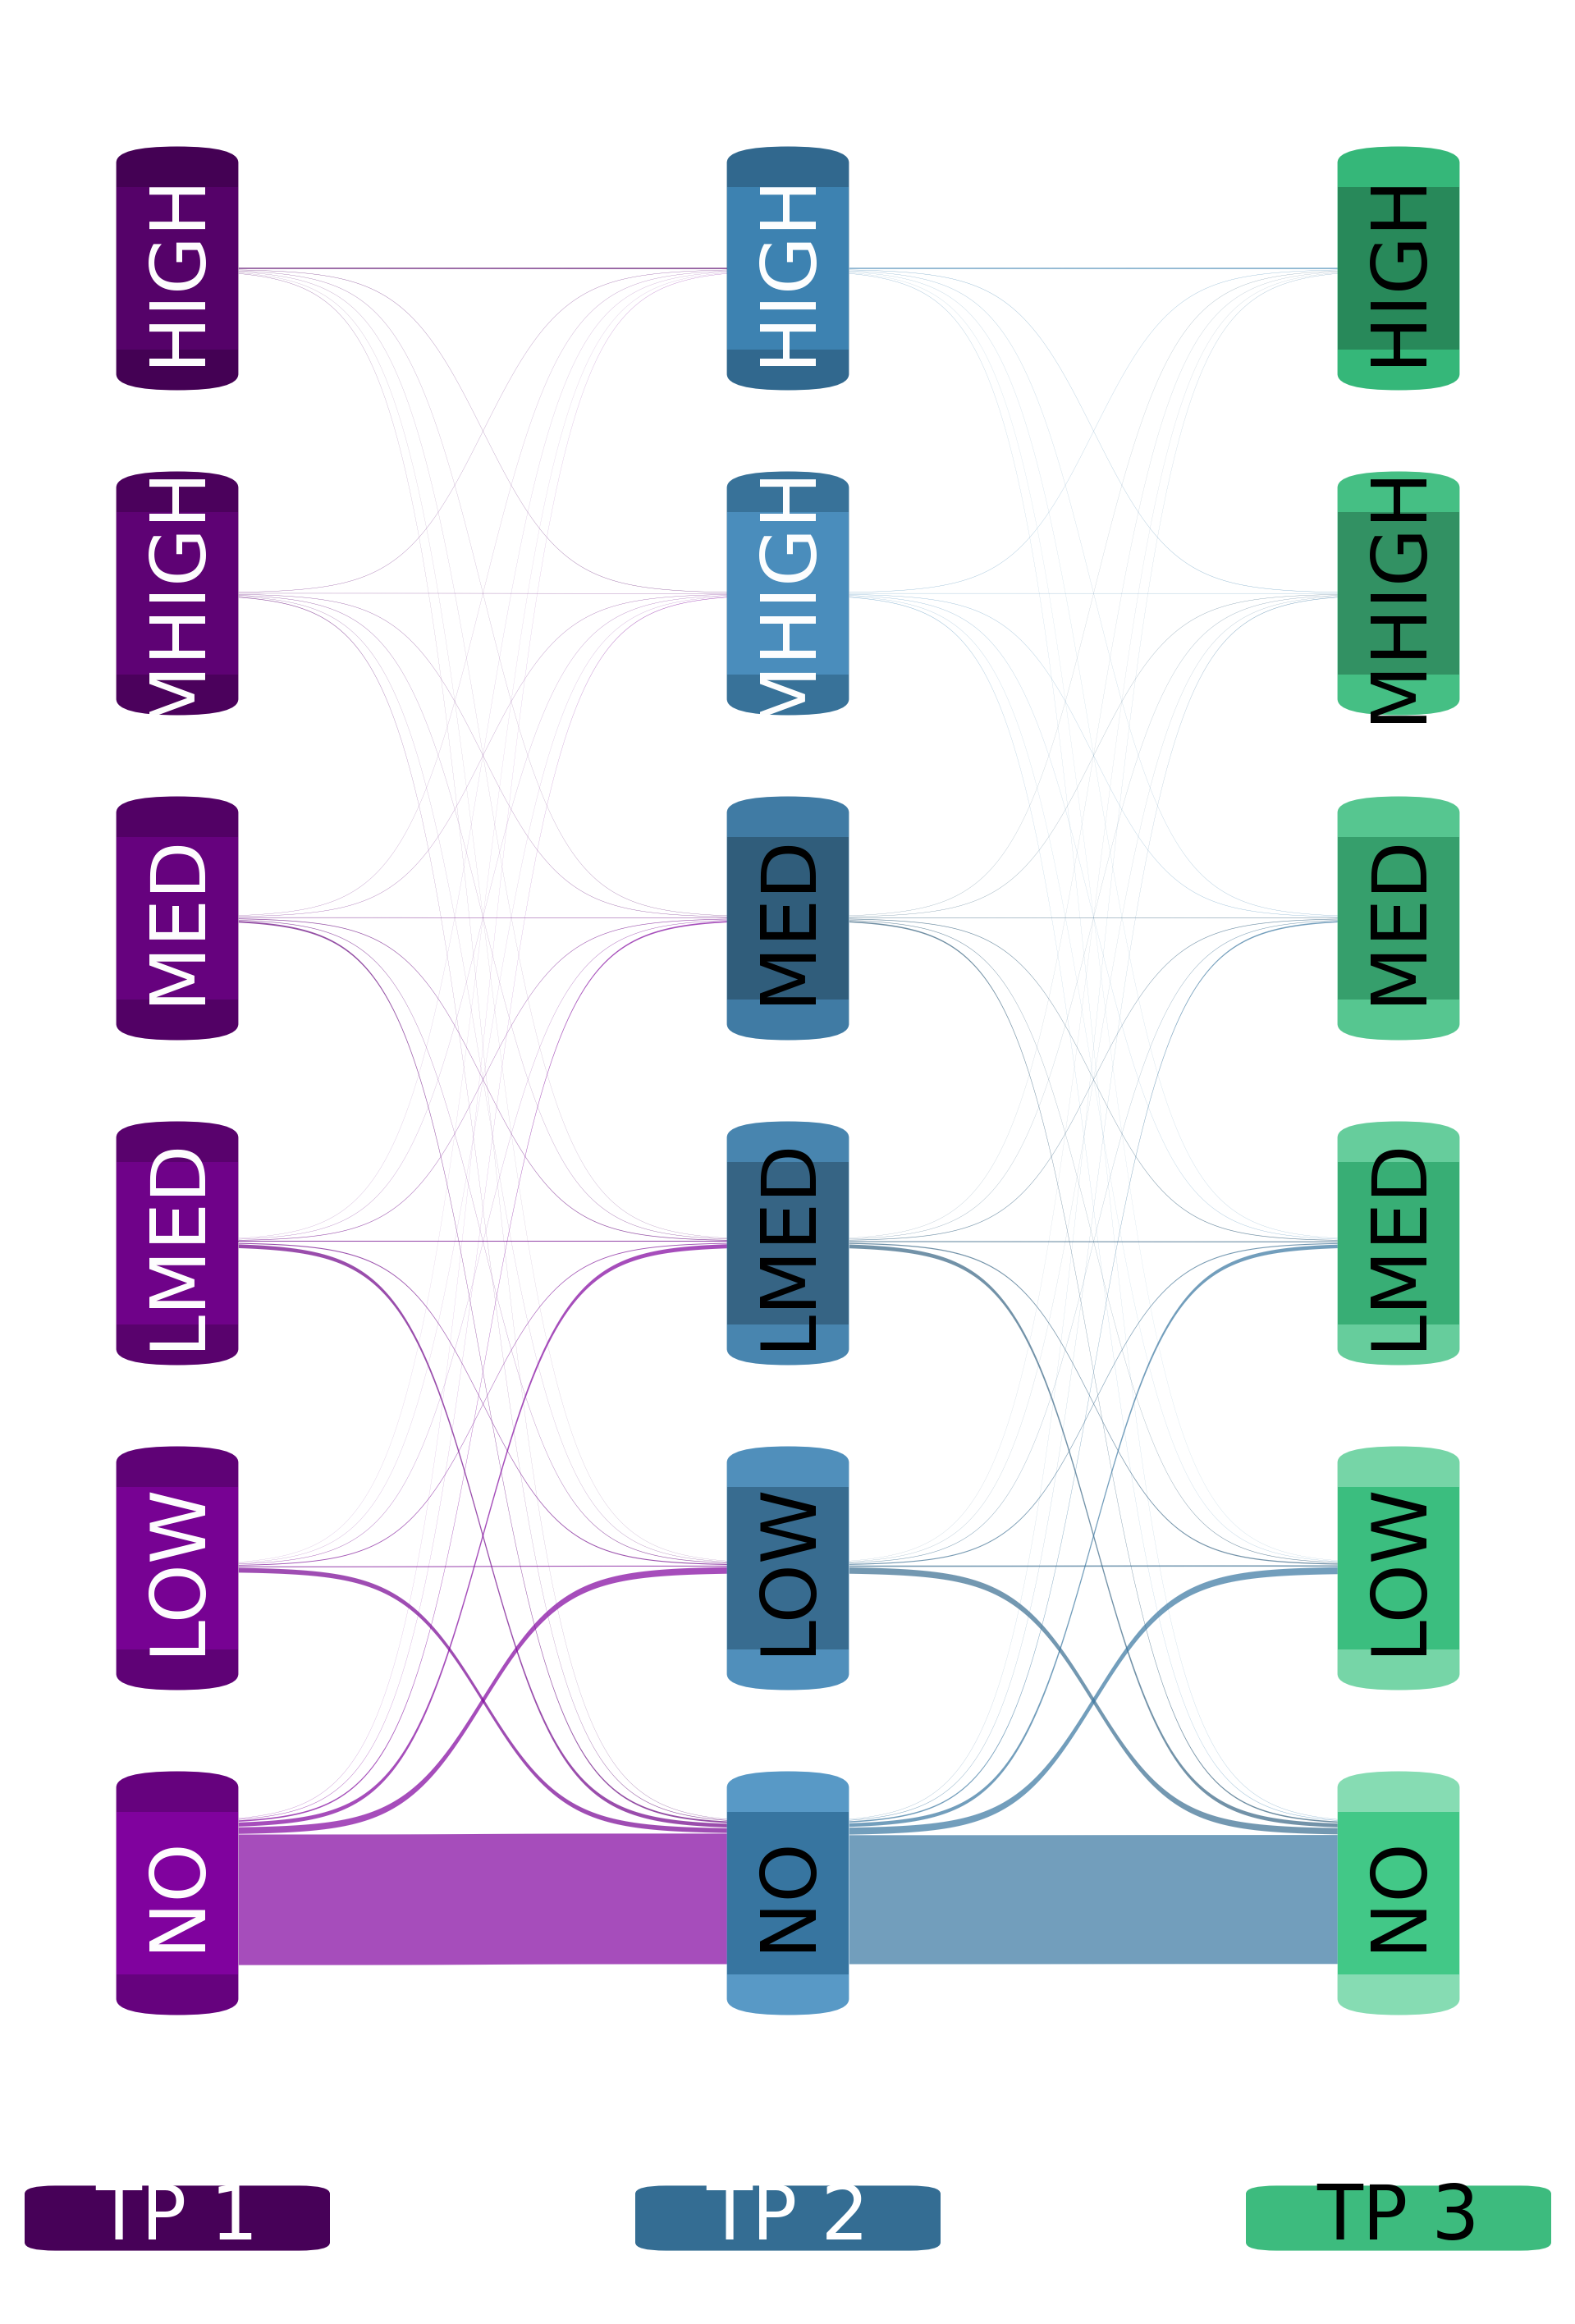

In [28]:
fa.plot_flows(verbose=False, seriesColors=sc, figsize=(8,12))

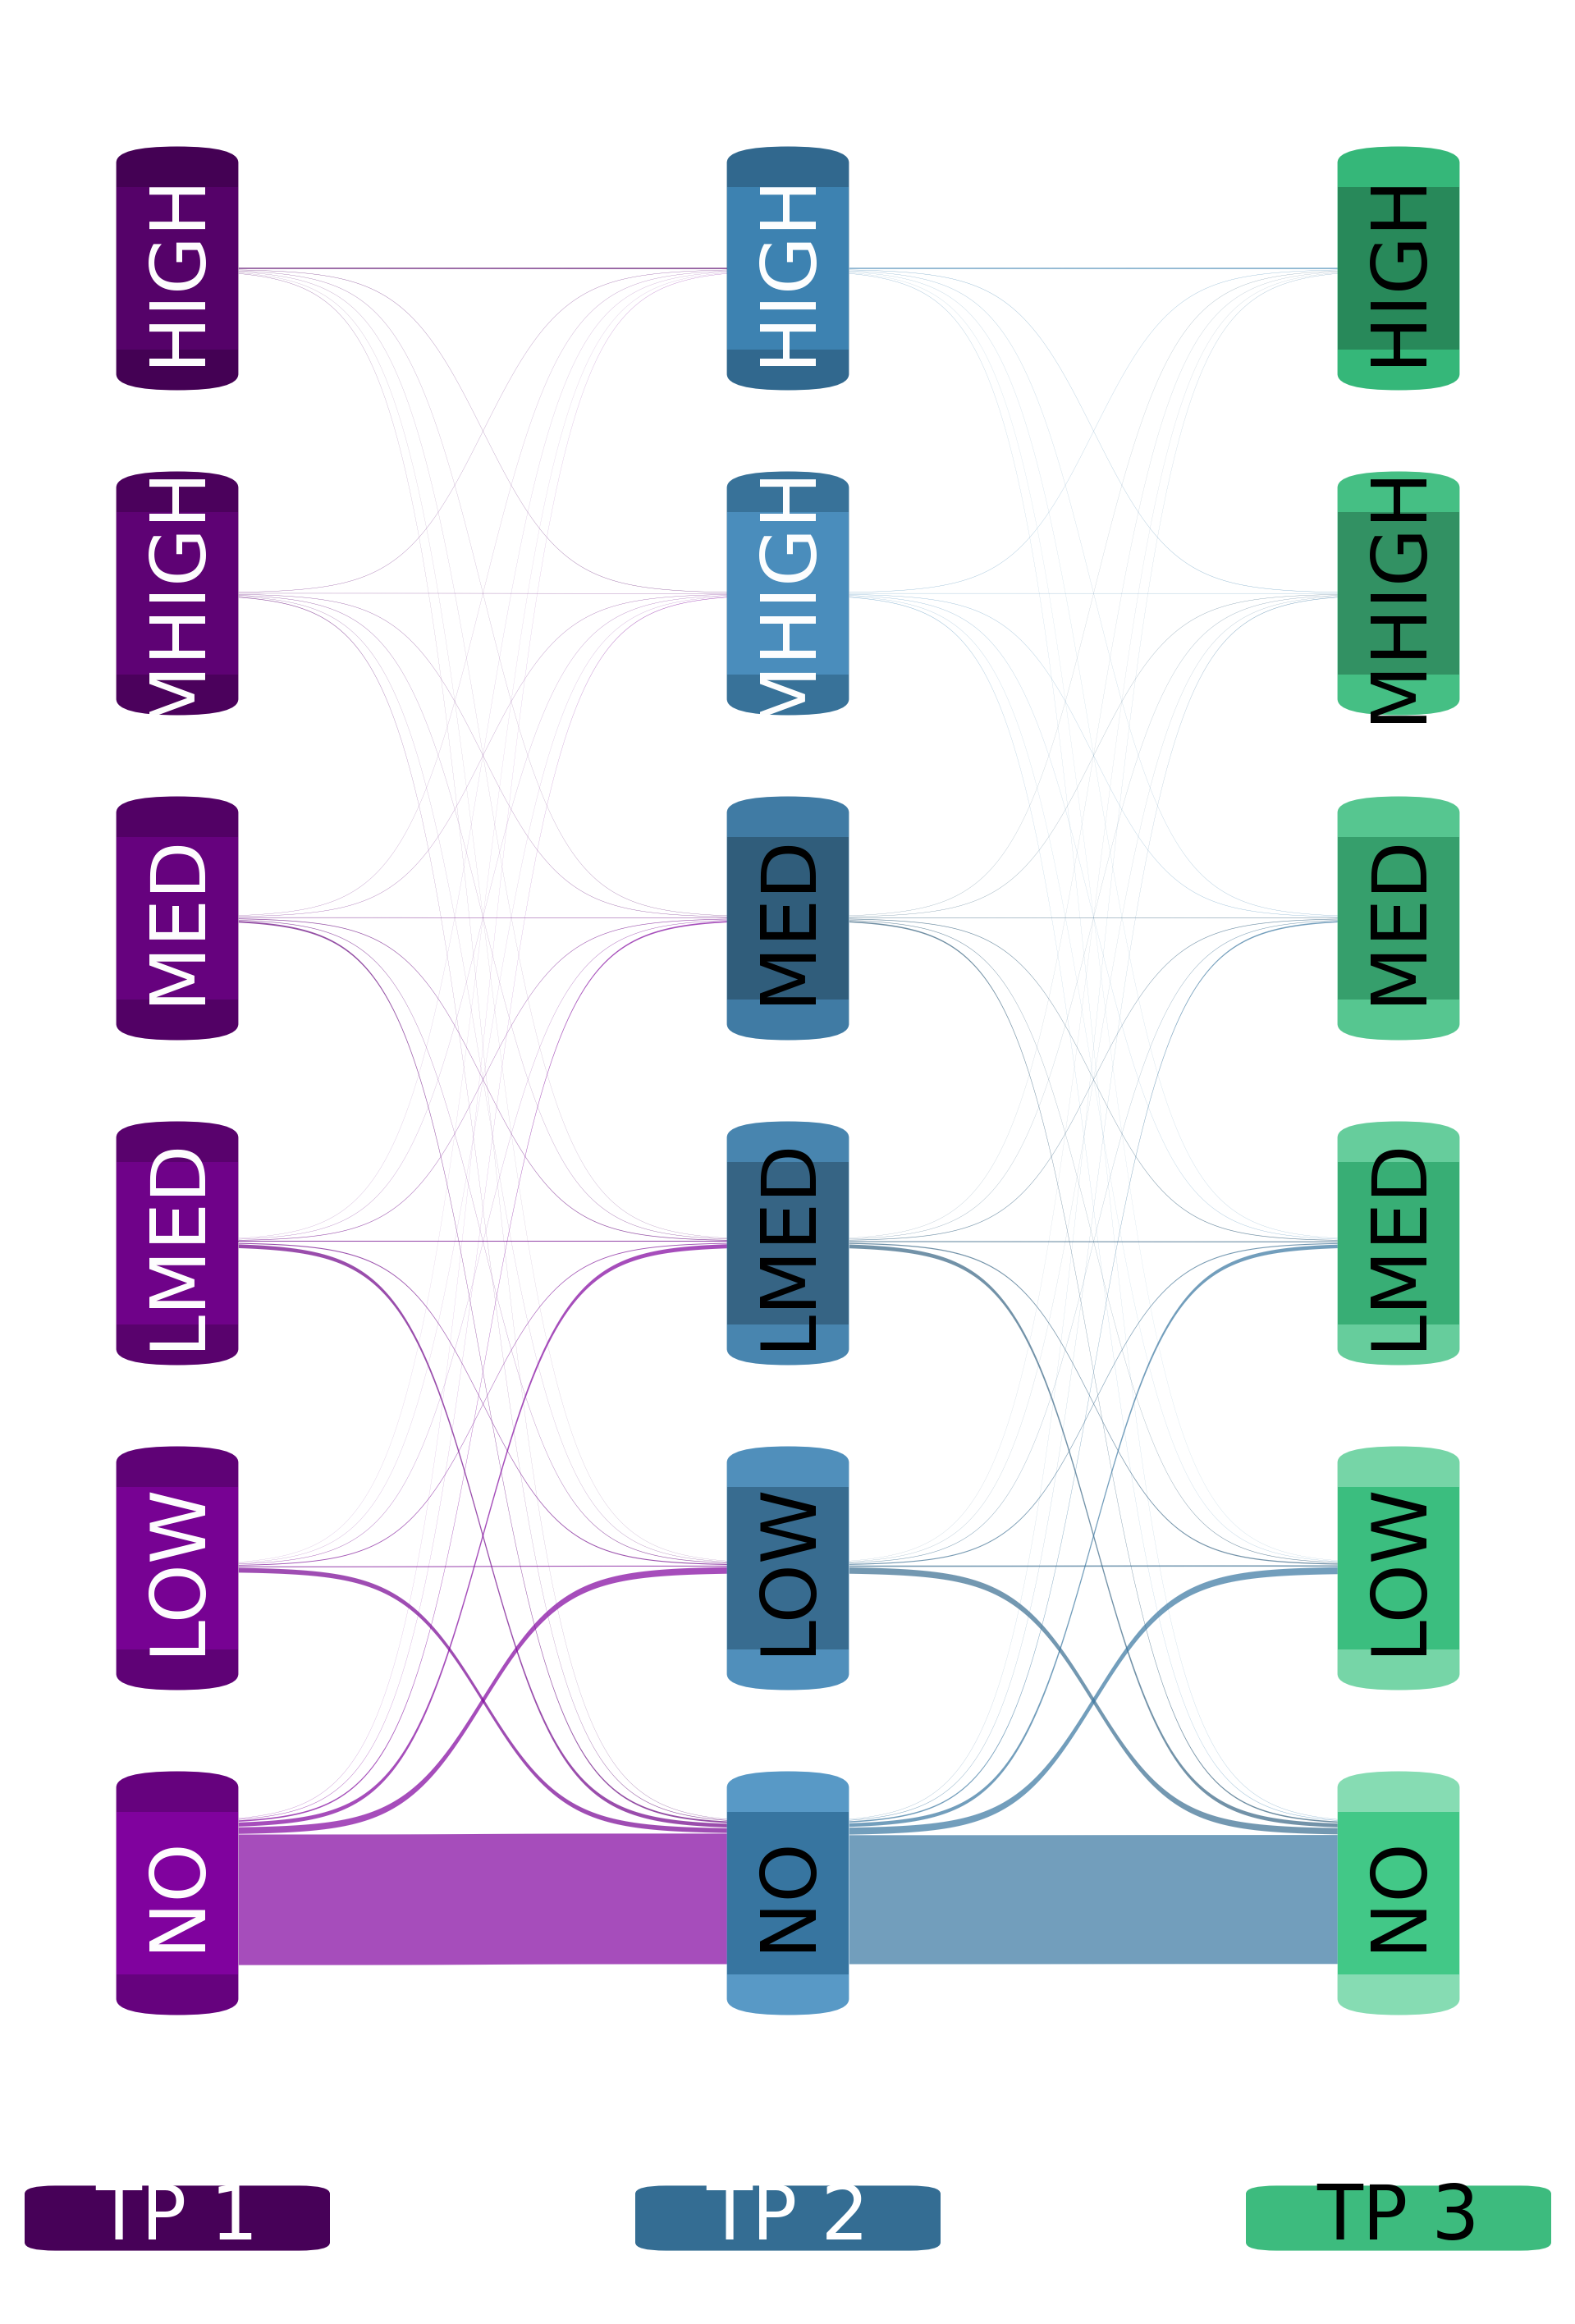

In [29]:
fa.plot_flows(outfile="plots/asympt_flows", seriesColors=sc, figsize=(8,12))

72 [('1', 'LMED'), ('2', 'NO'), ('3', 'NO')]
78 [('1', 'LMED'), ('2', 'LOW'), ('3', 'NO')]
79 [('1', 'LMED'), ('2', 'LOW'), ('3', 'LOW')]
108 [('1', 'MED'), ('2', 'NO'), ('3', 'NO')]
114 [('1', 'MED'), ('2', 'LOW'), ('3', 'NO')]
115 [('1', 'MED'), ('2', 'LOW'), ('3', 'LOW')]
120 [('1', 'MED'), ('2', 'LMED'), ('3', 'NO')]
121 [('1', 'MED'), ('2', 'LMED'), ('3', 'LOW')]
144 [('1', 'MHIGH'), ('2', 'NO'), ('3', 'NO')]
150 [('1', 'MHIGH'), ('2', 'LOW'), ('3', 'NO')]
151 [('1', 'MHIGH'), ('2', 'LOW'), ('3', 'LOW')]
156 [('1', 'MHIGH'), ('2', 'LMED'), ('3', 'NO')]
157 [('1', 'MHIGH'), ('2', 'LMED'), ('3', 'LOW')]
162 [('1', 'MHIGH'), ('2', 'MED'), ('3', 'NO')]
163 [('1', 'MHIGH'), ('2', 'MED'), ('3', 'LOW')]
180 [('1', 'HIGH'), ('2', 'NO'), ('3', 'NO')]
186 [('1', 'HIGH'), ('2', 'LOW'), ('3', 'NO')]
187 [('1', 'HIGH'), ('2', 'LOW'), ('3', 'LOW')]
192 [('1', 'HIGH'), ('2', 'LMED'), ('3', 'NO')]
193 [('1', 'HIGH'), ('2', 'LMED'), ('3', 'LOW')]
198 [('1', 'HIGH'), ('2', 'MED'), ('3', 'NO')]
199 

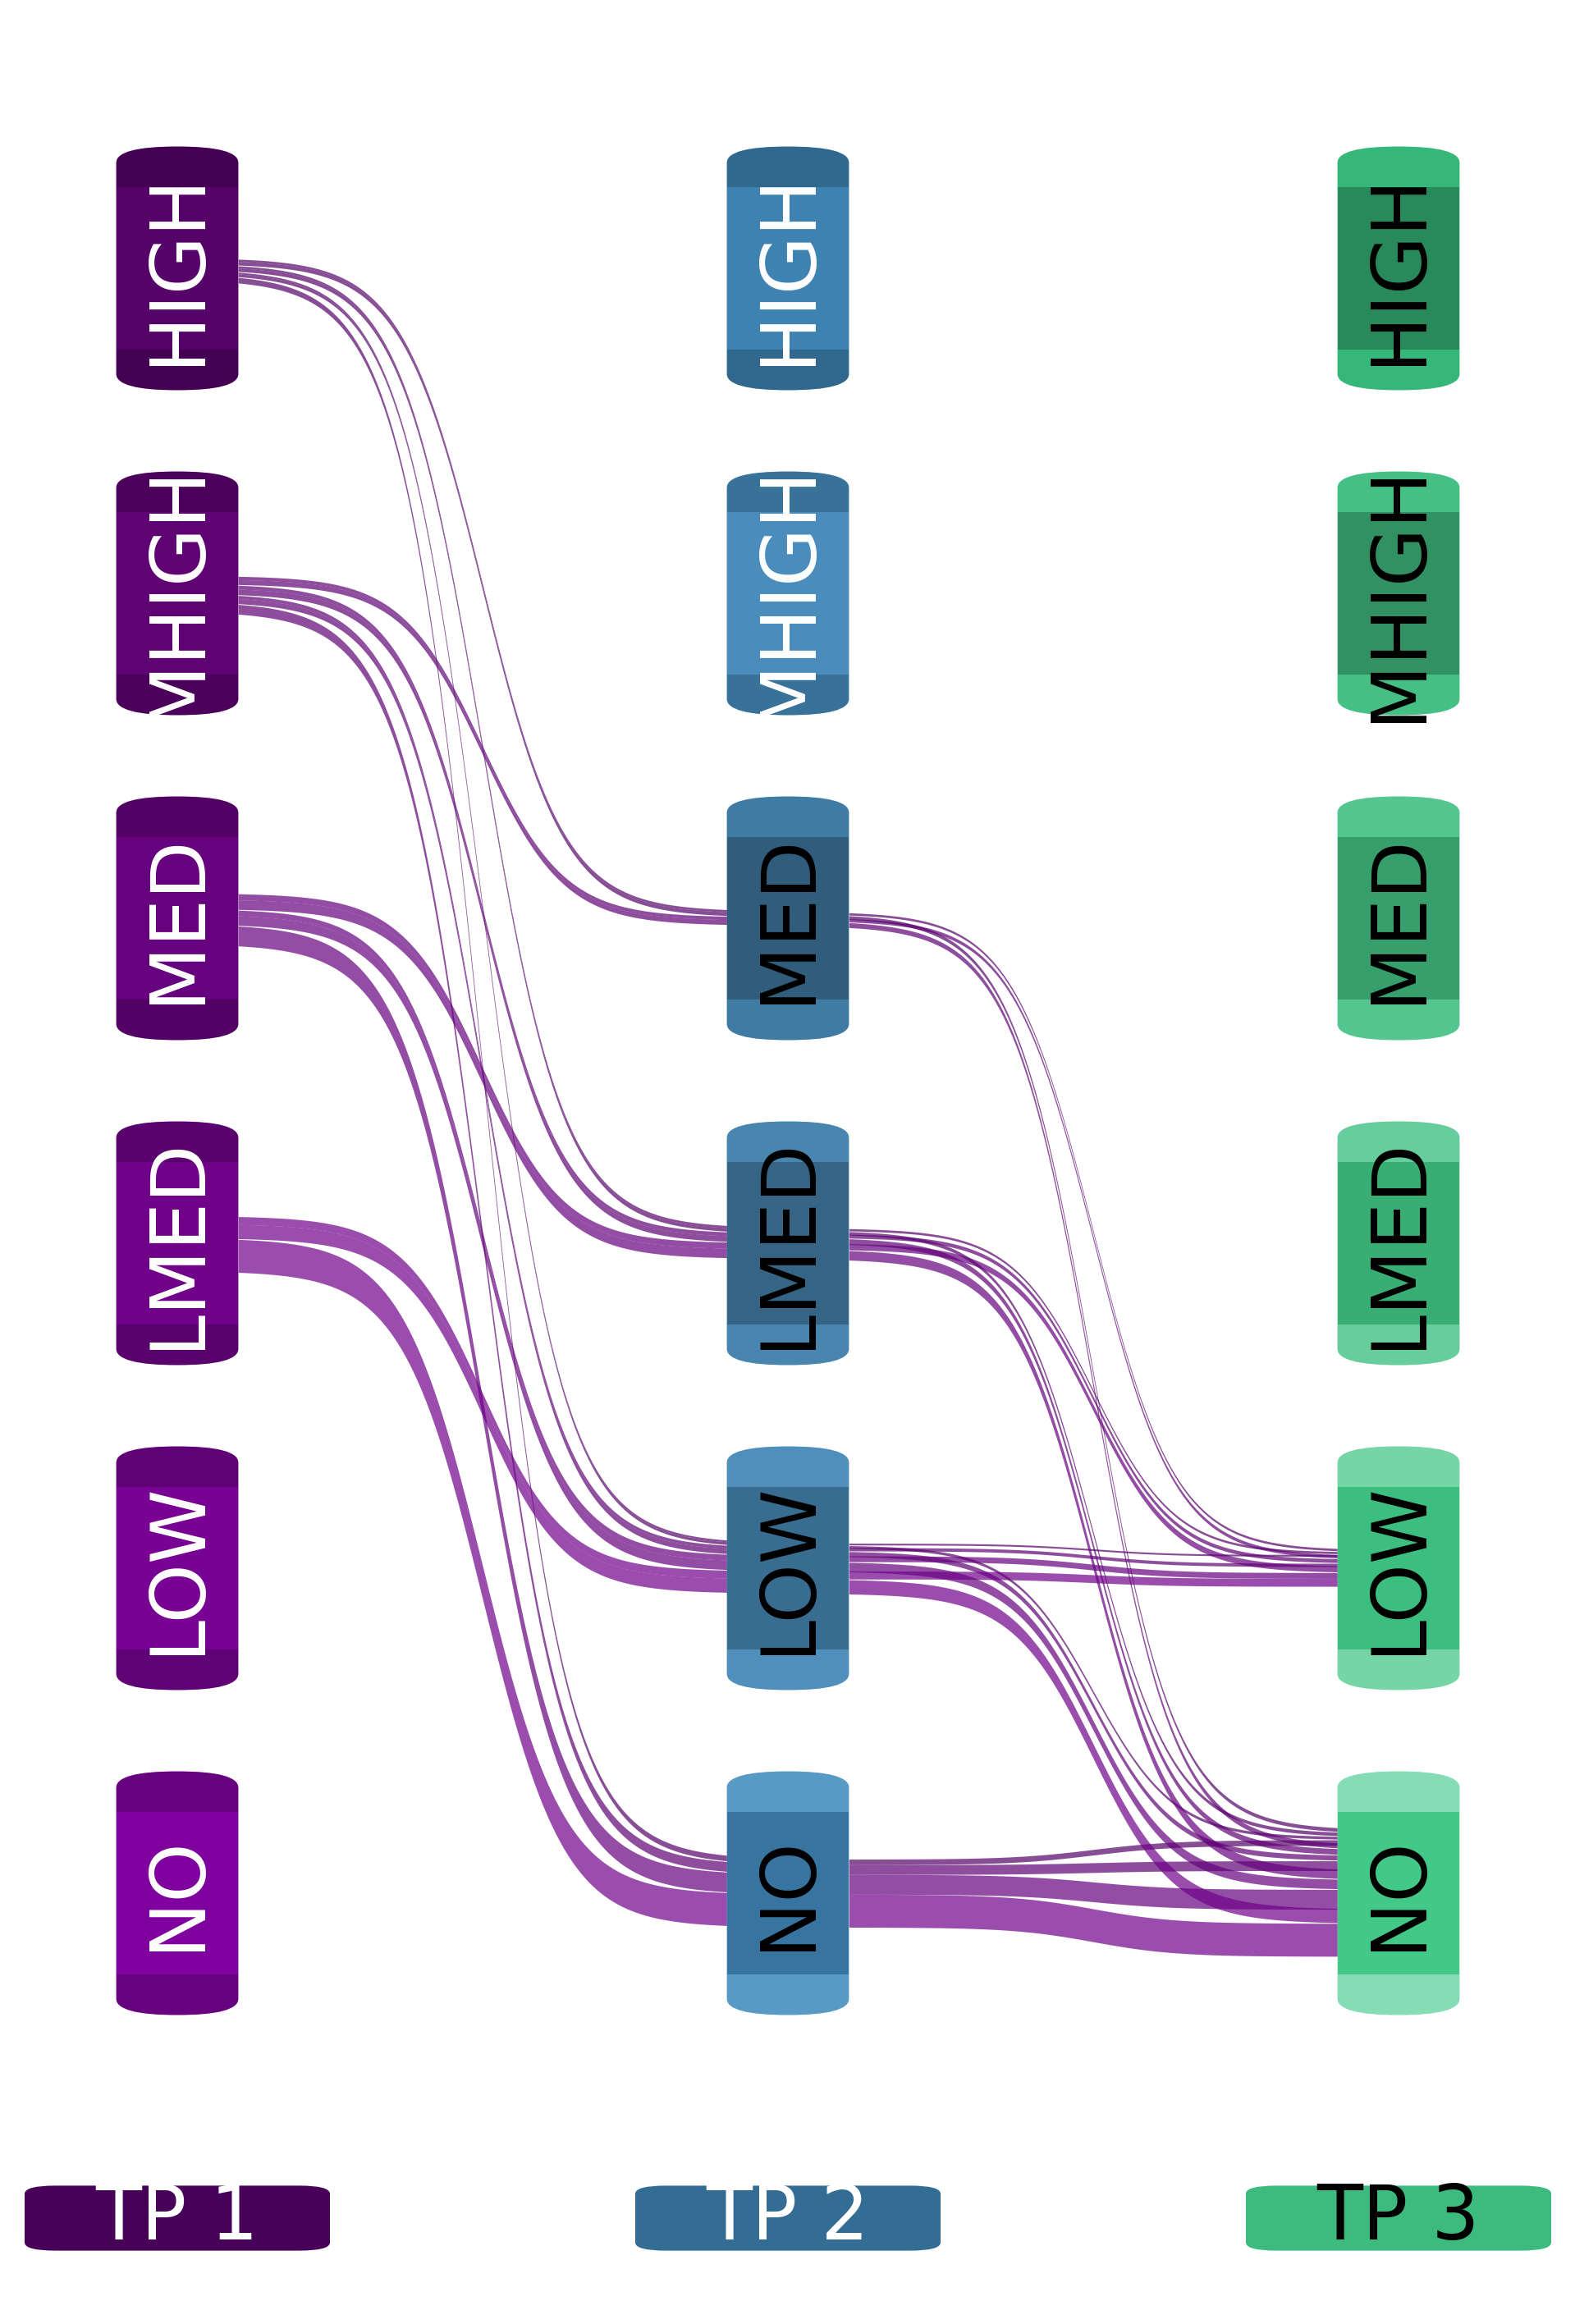

In [31]:
relFlows = fa.path_finder([">", ">="], minLevels=["LMED", None, None], maxLevels=["HIGH", "MED", "LOW"], verbose=True)

fa.plot_paths(use_flows=relFlows, seriesColors=sc, figsize=(8,12), outfile="plots/selected_paths")

In [32]:
# convert paths to edges

relEdges = fa.paths2edges(relFlows)

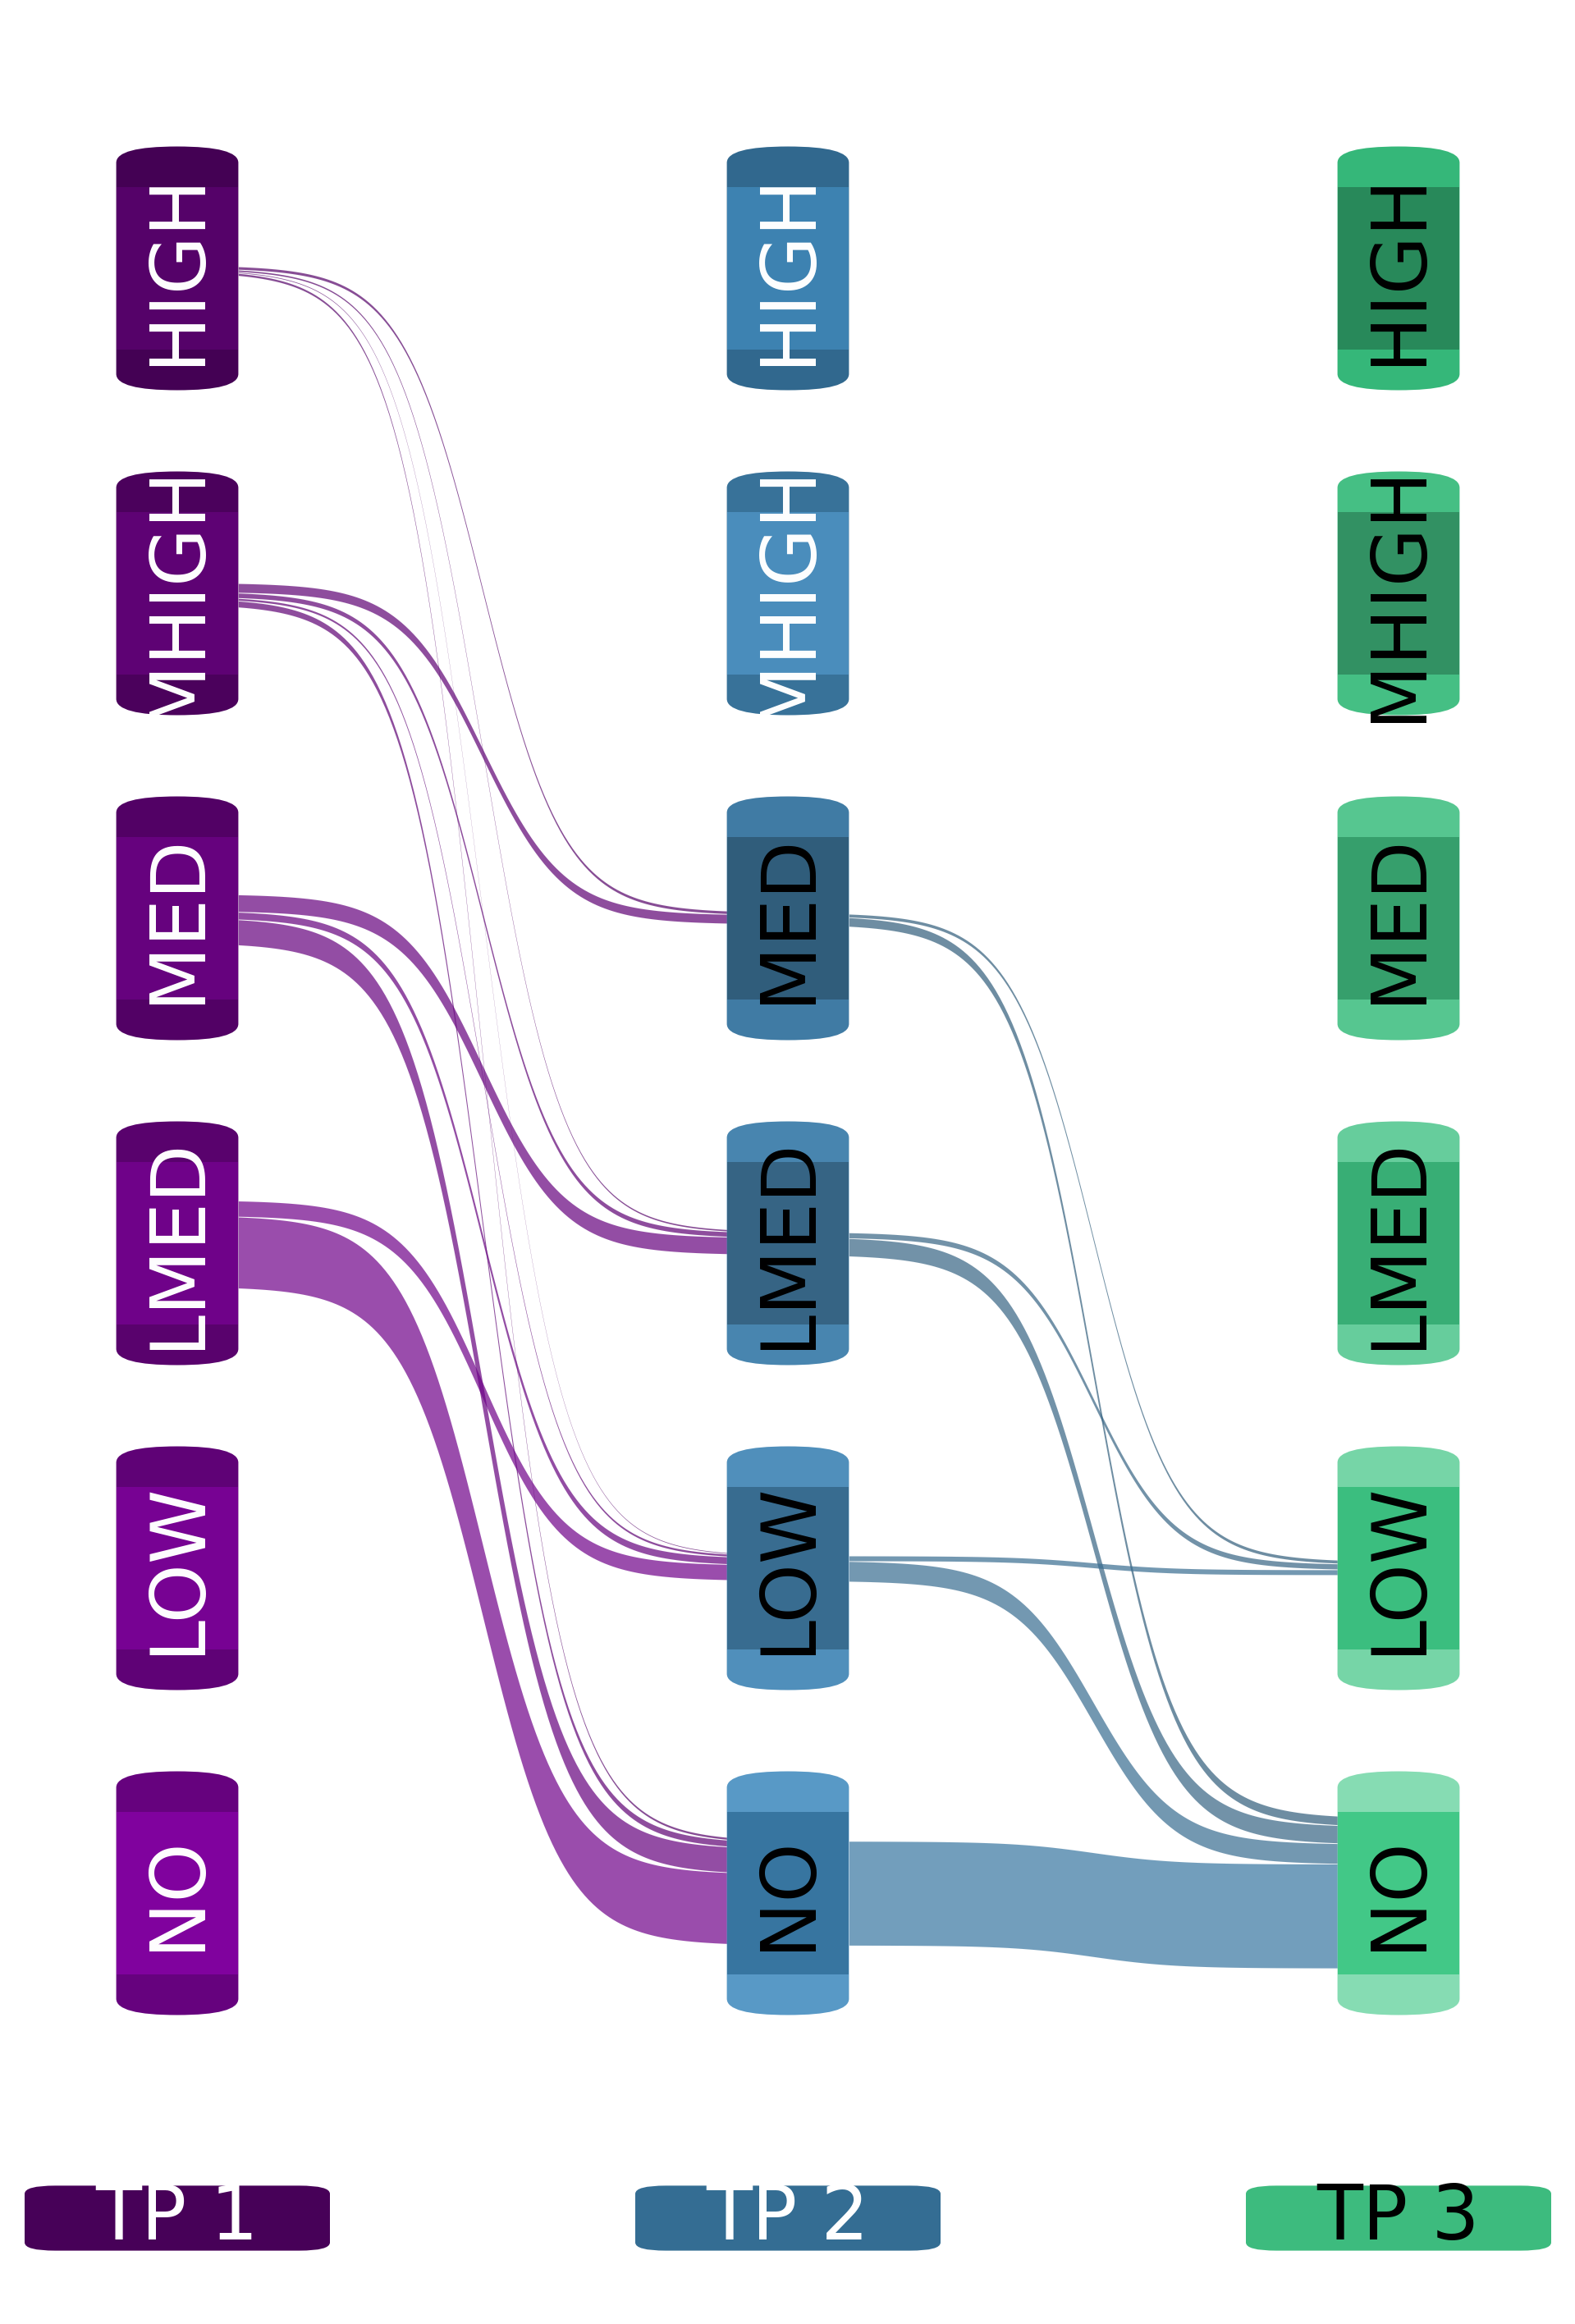

In [33]:
fa.plot_flows(relEdges, seriesColors=sc, figsize=(8,12), outfile="plots/selected_edges")

In [34]:
pwScoresGrp = fa.analyse_pathways(additional_genesets=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_edges=relEdges)
pwScoresGrp

Loading pathways from ReactomePathways.gmt
Identified 2612 pathways
Calculating p-values for groups [1, 2, 3, 4, 10, 50, 100, 2605]


pwid                                             pwname  \
14     R-HSA-112122      ALKBH2 mediated reversal of alkylation damage   
17    R-HSA-5467333  APC truncation mutants are not K63 polyubiquit...   
30    R-HSA-9717264                     ASP-3026-resistant ALK mutants   
46    R-HSA-2978092  Abnormal conversion of 2-oxoglutarate to 2-hyd...   
160    R-HSA-211957  Aromatic amines can be N-hydroxylated or N-dea...   
...             ...                                                ...   
2566    R-HSA-72172                                      mRNA Splicing   
2567    R-HSA-72163                      mRNA Splicing - Major Pathway   
2592    R-HSA-72312                                    rRNA processing   
2594  R-HSA-8868773         rRNA processing in the nucleus and cytosol   
2603    R-HSA-72306                                    tRNA processing   

         pwFlow  pwGenes   allPwFlow   allPwGenes  pw_gene_intersection  \
14     0.006673        1  553.061132  7670.000198                     1   
17     0.070002        1  553.061132  7670.000198                     1   
30     0.000000        1  553.061132  7670.000198                     0   
46     0.035348        1  553.061132  7670.000198                     1   
160    0.000000        1  553.061132  7670.000198                     0   
...         ...      ...         ...          ...                   ...   
2566  16.890305      215  553.061132  7670.000198                   209   
2567  16.596713      204  553.061132  7670.000198                   201   
2592   5.941834      237  553.061132  7670.000198                   210   
2594   5.702293      199  553.061132  7670.000198                   188   
2603   3.657344      146  553.061132  7670.000198                   119   

      pw_coverage  genes_coverage  mean_coverage  pw_coverage_zscore  \
14       0.006673        0.000012   8.052140e-08           -0.857369   
17       0.070002        0.000127   8.860204e-06            0.553988   
30       0.000000        0.000000   0.000000e+00           -1.006093   
46       0.035348        0.000064   2.259181e-06           -0.218320   
160      0.000000        0.000000   0.000000e+00           -1.006093   
...           ...             ...            ...                 ...   
2566     0.078560        0.030540   2.399183e-03            1.953266   
2567     0.081356        0.030009   2.441411e-03            2.108955   
2592     0.025071        0.010744   2.693516e-04           -1.024191   
2594     0.028655        0.010310   2.954424e-04           -0.824703   
2603     0.025050        0.006613   1.656554e-04           -1.025345   

      pw_coverage_pval  pw_coverage_adj_pval  
14            1.000000              1.000000  
17            0.289793              1.000000  
30            1.000000              1.000000  
46            1.000000              1.000000  
160           1.000000              1.000000  
...                ...                   ...  
2566          0.025394              0.898838  
2567          0.017474              0.848517  
2592          1.000000              1.000000  
2594          1.000000              1.000000  
2603          1.000000              1.000000  

[2614 rows x 13 columns]

pwid                                             pwname  \
2612      ISG_SHORT                                          ISG_SHORT   
418   R-HSA-3134963  DEx/H-box helicases activate type I IFN and in...   
1876  R-HSA-9707587        Regulation of HMOX1 expression and activity   
2289  R-HSA-6791055  TALDO1 deficiency: failed conversion of SH7P, ...   
2288  R-HSA-6791462  TALDO1 deficiency: failed conversion of  Fru(6...   
105    R-HSA-114294  Activation, translocation and oligomerization ...   
1257  R-HSA-2644607  Loss of Function of FBXW7 in Cancer and NOTCH1...   
899    R-HSA-163210          Formation of ATP by chemiosmotic coupling   
848   R-HSA-2644605                 FBXW7 Mutants and NOTCH1 in Cancer   
2040  R-HSA-3065676               SUMO is conjugated to E1 (UBA2:SAE1)   
2613       ISG_LONG                                           ISG_LONG   
1963   R-HSA-611105                     Respiratory electron transport   
1964   R-HSA-163200  Respiratory electron transport, ATP synthesis ...   
1910   R-HSA-211733  Regulation of activated PAK-2p34 by proteasome...   
397   R-HSA-1236978  Cross-presentation of soluble exogenous antige...   
1880   R-HSA-877312                       Regulation of IFNG signaling   
1312  R-HSA-2206292                             MPS VII - Sly syndrome   
468   R-HSA-9734195            Defective APRT disrupts adenine salvage   
2362   R-HSA-844456                             The NLRP3 inflammasome   
1319  R-HSA-9683610                Maturation of nucleoprotein_9683610   

         pwFlow  pwGenes   allPwFlow   allPwGenes  pw_gene_intersection  \
2612   4.416877       14  553.061132  7670.000198                    14   
418    1.112879        7  553.061132  7670.000198                     7   
1876   0.694031        5  553.061132  7670.000198                     5   
2289   0.202373        1  553.061132  7670.000198                     1   
2288   0.202373        1  553.061132  7670.000198                     1   
105    0.386408        2  553.061132  7670.000198                     2   
1257   0.635177        5  553.061132  7670.000198                     5   
899    2.051885       18  553.061132  7670.000198                    18   
848    0.635177        5  553.061132  7670.000198                     5   
2040   0.637264        5  553.061132  7670.000198                     5   
2613   7.755493       55  553.061132  7670.000198                    40   
1963  10.054418      103  553.061132  7670.000198                   103   
1964  12.347421      127  553.061132  7670.000198                   124   
1910   5.552746       50  553.061132  7670.000198                    48   
397    5.483911       50  553.061132  7670.000198                    45   
1880   1.527312       14  553.061132  7670.000198                    14   
1312   0.172232        1  553.061132  7670.000198                     1   
468    0.164890        1  553.061132  7670.000198                     1   
2362   1.704496       17  553.061132  7670.000198                    16   
1319   1.172900       12  553.061132  7670.000198                    11   

      pw_coverage  genes_coverage  mean_coverage  pw_coverage_zscore  \
2612     0.315491        0.007986       0.002520           11.617978   
418      0.158983        0.002012       0.000320            4.167260   
1876     0.138806        0.001255       0.000174            3.467996   
2289     0.202373        0.000366       0.000074            3.504066   
2288     0.202373        0.000366       0.000074            3.504066   
105      0.193204        0.000699       0.000135            3.407361   
1257     0.127035        0.001148       0.000146            3.060049   
899      0.113994        0.003710       0.000423            3.076865   
848      0.127035        0.001148       0.000146            3.060049   
2040     0.127453        0.001152       0.000147            3.074511   
2613     0.141009        0.014023       0.001977            3.072846   
1963     0.097616   

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pw_coverage_pval',
       'pw_coverage_adj_pval'],
      dtype='object')
False
False
(10, 14)


/mnt/raidbio/extproj/projekte/FlowSets/examples/../flowset.py:2405: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


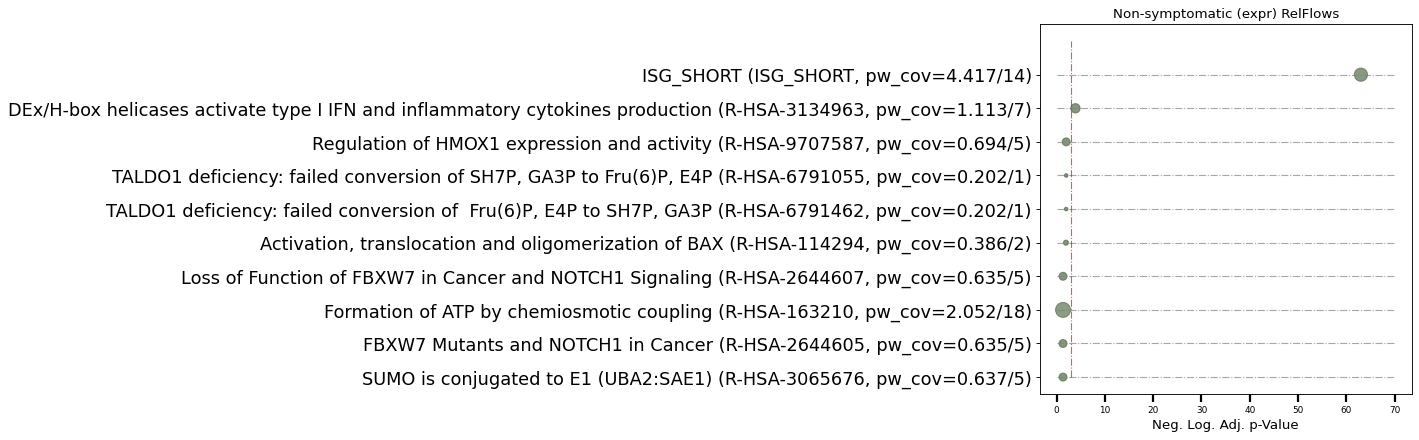

In [37]:
selPWsGrp = pwScoresGrp[(pwScoresGrp["pw_coverage_adj_pval"] < 1)].sort_values("pw_coverage_adj_pval", ascending=True).head(20)
display(selPWsGrp)
fa.plotORAresult(selPWsGrp, "Non-symptomatic (expr) RelFlows", numResults=10, figsize=(6,6), outfile="plots/asympt_ra")

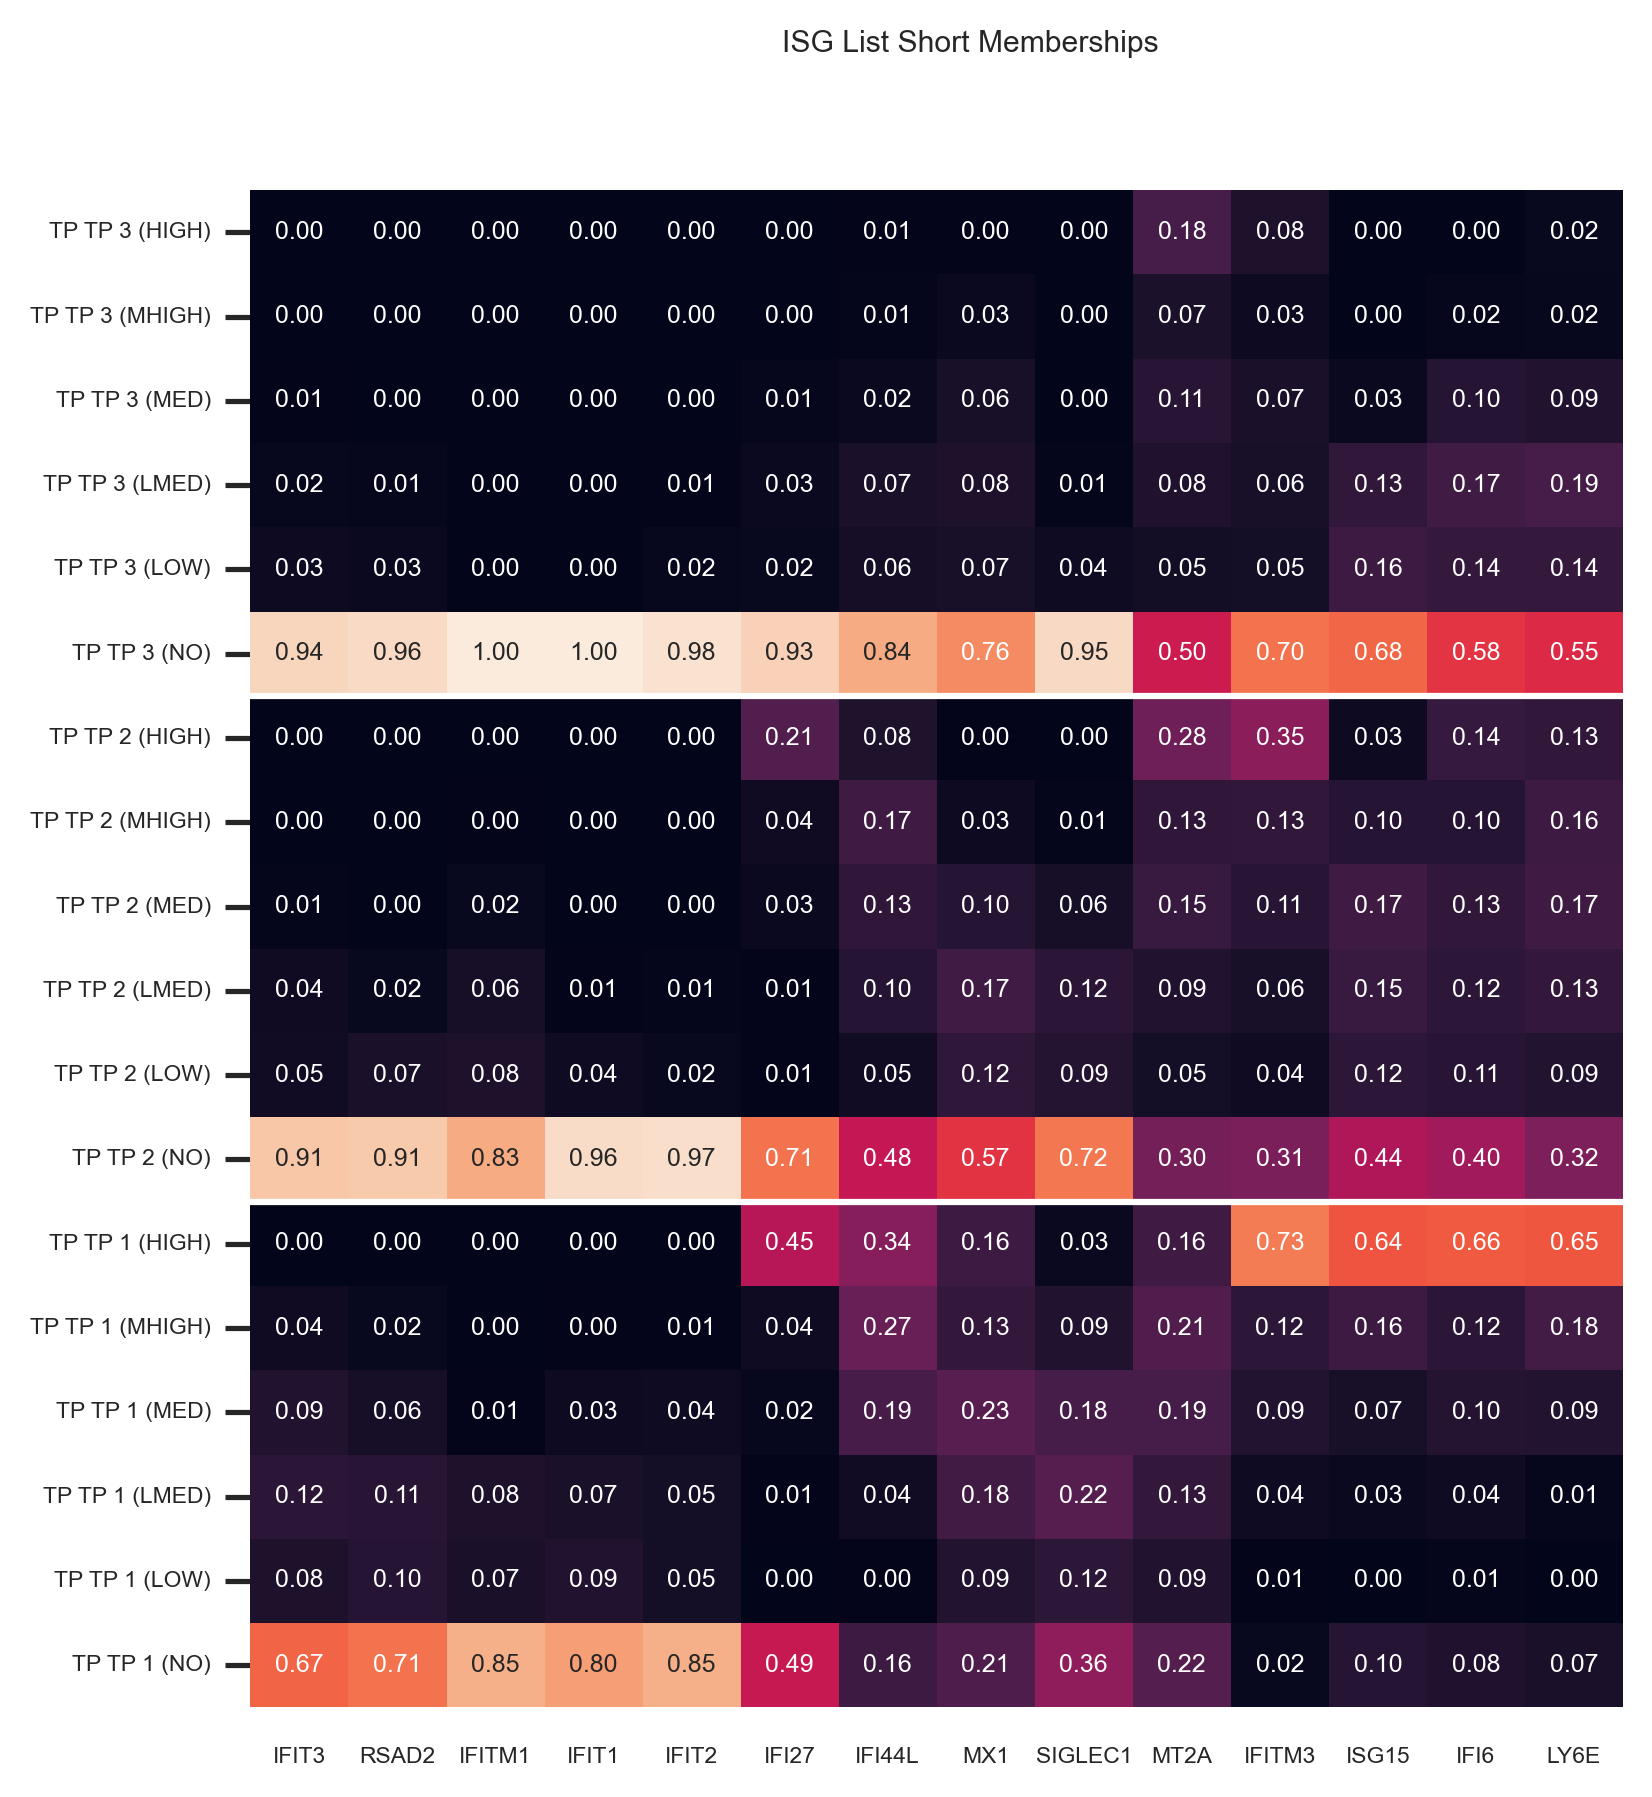

In [40]:
_=fa.plot_state_memberships(genes=isgListShort, name="ISG List Short Memberships", cluster_genes=True, outfile="plots/asympt_memberships", prefix="TP", font_scale=0.5)

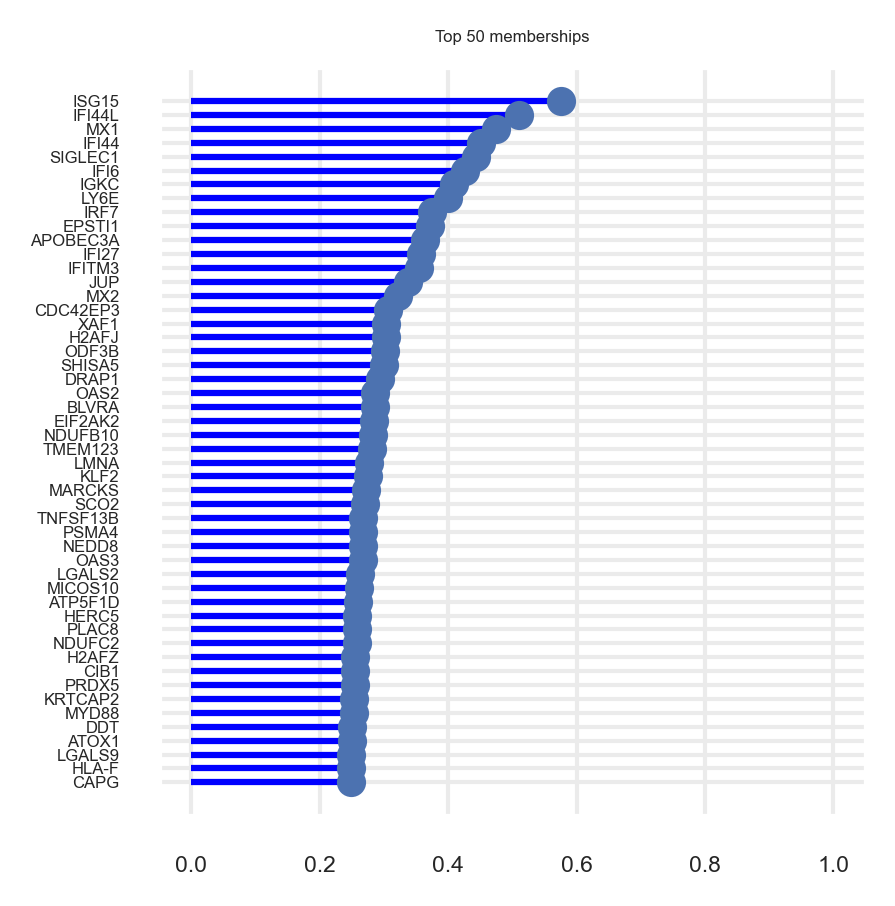

In [42]:
_=fa.plot_flow_memberships(use_edges=relEdges, outfile="plots/asympt_flow_memberships", n_genes=50, gene_exclude_patterns=["AC", "AF", "AL", "LINC"], figsize=(3,3), plot_histogram=False)

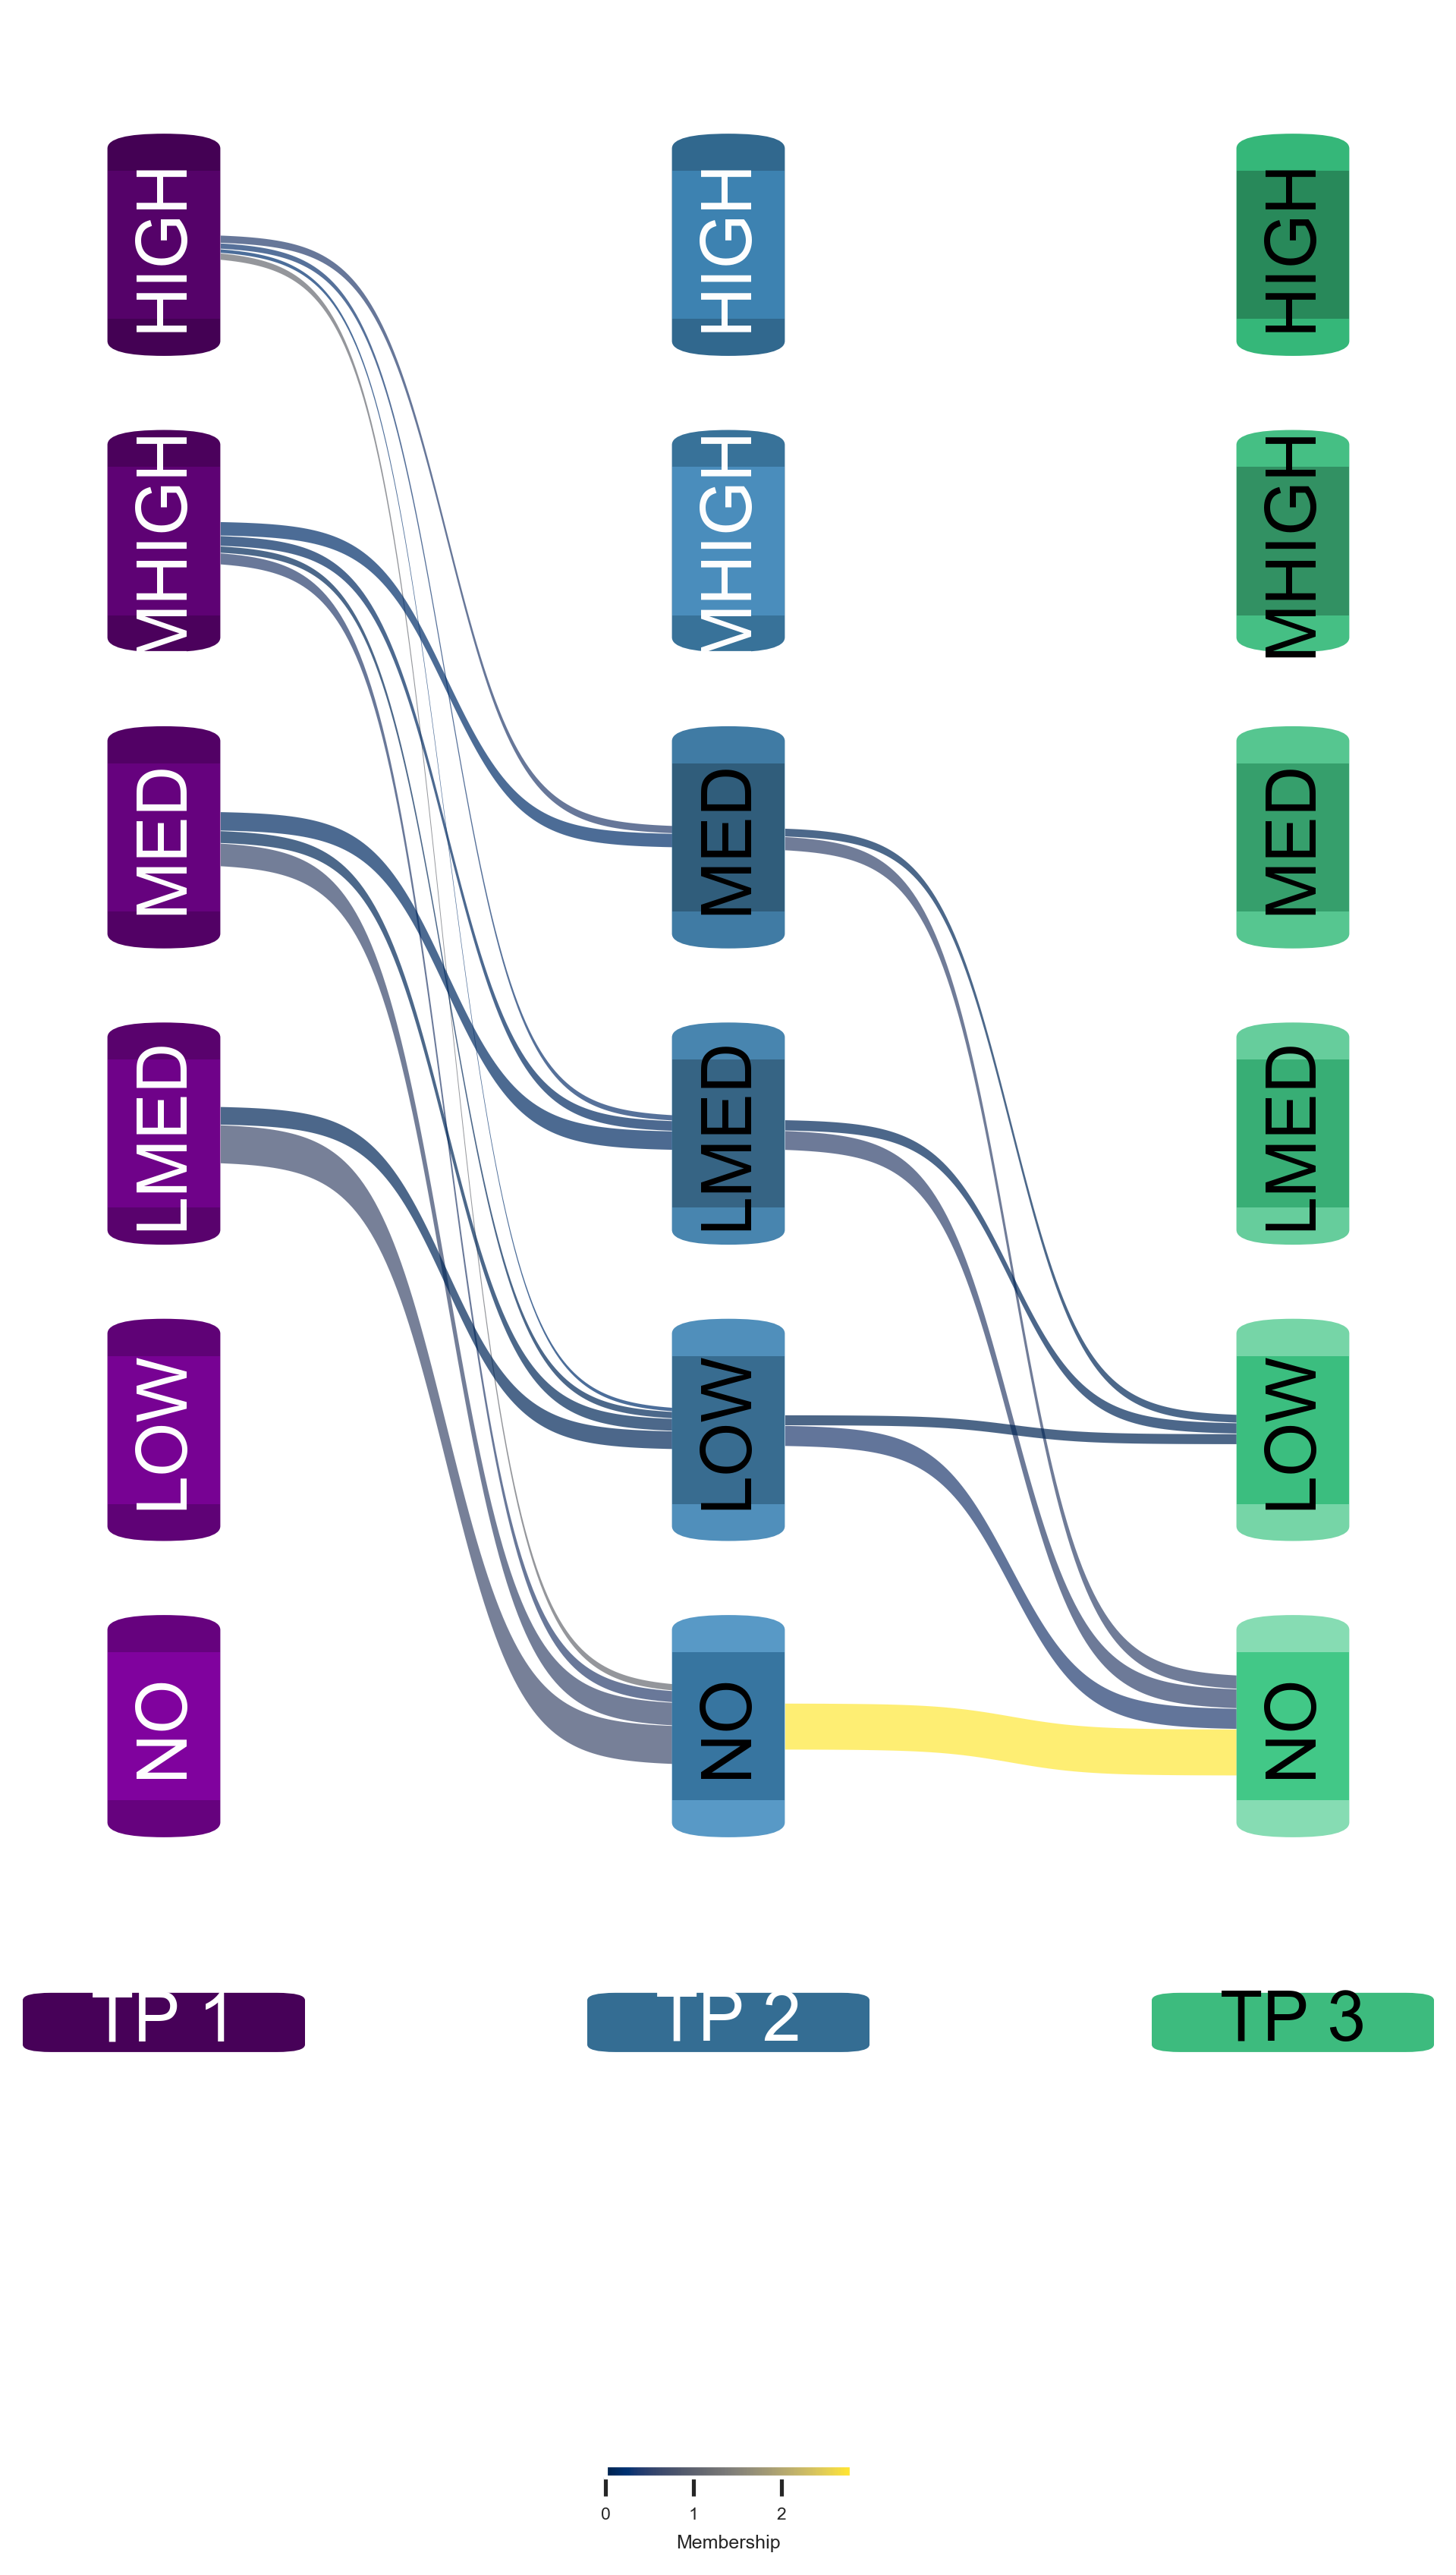

In [48]:
_=fa.visualize_genes(genes=isgListShort, use_edges=relEdges, outfile="plots/asympt_isg_flow", figsize=(8,14), seriesColors=sc)

In [52]:
pwScoresGrpGO = fa.analyse_pathways(genesets_file="go_human.bp.gmt", additional_genesets=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_edges=relEdges)
pwScoresGrpGO

Loading pathways from go_human.bp.gmt
Identified 12535 pathways
Calculating p-values for groups [1, 2, 3, 4, 10, 50, 100, 1226]


pwid                                             pwname    pwFlow  \
7     GO:0010789  meiotic sister chromatid cohesion involved in ...  0.000000   
20    GO:1900101  regulation of endoplasmic reticulum unfolded p...  0.018784   
25    GO:0043610             regulation of carbohydrate utilization  0.000000   
28    GO:0072522    purine-containing compound biosynthetic process  0.000000   
53    GO:0043416  regulation of skeletal muscle tissue regeneration  0.000000   
...          ...                                                ...       ...   
1774  GO:0010976  positive regulation of neuron projection devel...  3.512403   
1860  GO:0001822                                 kidney development  2.553559   
1861  GO:0007568                                              aging  5.188821   
1881  GO:0018108                  peptidyl-tyrosine phosphorylation  4.784888   
2493  GO:0006457                                    protein folding  7.430079   

      pwGenes   allPwFlow   allPwGenes  pw_gene_intersection  pw_coverage  \
7           1  553.061132  11415.00029                     1     0.000000   
20          1  553.061132  11415.00029                     1     0.018784   
25          1  553.061132  11415.00029                     0     0.000000   
28          1  553.061132  11415.00029                     0     0.000000   
53          1  553.061132  11415.00029                     0     0.000000   
...       ...         ...          ...                   ...          ...   
1774      111  553.061132  11415.00029                    73     0.031643   
1860      115  553.061132  11415.00029                    64     0.022205   
1861      146  553.061132  11415.00029                   102     0.035540   
1881      139  553.061132  11415.00029                    99     0.034424   
2493      156  553.061132  11415.00029                   123     0.047629   

      genes_coverage  mean_coverage  pw_coverage_zscore  pw_coverage_pval  \
7           0.000000   0.000000e+00           -1.014182          1.000000   
20          0.000034   6.379779e-07           -0.690200          1.000000   
25          0.000000   0.000000e+00           -1.014182          1.000000   
28          0.000000   0.000000e+00           -1.014182          1.000000   
53          0.000000   0.000000e+00           -1.014182          1.000000   
...              ...            ...                 ...               ...   
1774        0.006351   2.009613e-04           -0.218739          1.000000   
1860        0.004617   1.025229e-04           -0.894210          1.000000   
1861        0.009382   3.334352e-04            0.060126          0.476028   
1881        0.008652   2.978212e-04           -0.019757          1.000000   
2493        0.013434   6.398661e-04            0.925278          0.177411   

      pw_coverage_adj_pval  
7                      1.0  
20                     1.0  
25                     1.0  
28                     1.0  
53                     1.0  
...                    ...  
1774                   1.0  
1860                   1.0  
1861                   1.0  
1881                   1.0  
2493                   1.0  

[12537 rows x 13 columns]

pwid                                             pwname  \
12535   ISG_SHORT                                          ISG_SHORT   
5175   GO:0070106          interleukin-27-mediated signaling pathway   
5995   GO:0032020                          ISG15-protein conjugation   
2460   GO:0035456                        response to interferon-beta   
12536    ISG_LONG                                           ISG_LONG   
7070   GO:0035455                       response to interferon-alpha   
4936   GO:0034340                      response to type I interferon   
397    GO:0045071    negative regulation of viral genome replication   
988    GO:0042776  proton motive force-driven mitochondrial ATP s...   
7189   GO:0036261             7-methylguanosine cap hypermethylation   
987    GO:0009060                                aerobic respiration   
8673   GO:0019941   modification-dependent protein catabolic process   
842    GO:0034134             toll-like receptor 2 signaling pathway   
396    GO:0009615                                  response to virus   
3296   GO:1903241                    U2-type prespliceosome assembly   
1267   GO:0070585              protein localization to mitochondrion   
5173   GO:0060339  negative regulation of type I interferon-media...   
2239   GO:0006122  mitochondrial electron transport, ubiquinol to...   
777    GO:0051902  negative regulation of mitochondrial depolariz...   
5293   GO:0006754                           ATP biosynthetic process   

         pwFlow  pwGenes   allPwFlow   allPwGenes  pw_gene_intersection  \
12535  4.416877       14  553.061132  11415.00029                    14   
5175   1.554435        7  553.061132  11415.00029                     7   
5995   1.216509        6  553.061132  11415.00029                     6   
2460   1.897932       11  553.061132  11415.00029                    10   
12536  7.755493       55  553.061132  11415.00029                    40   
7070   1.704807       11  553.061132  11415.00029                     9   
4936   1.635409        9  553.061132  11415.00029                     9   
397    5.899080       44  553.061132  11415.00029                    39   
988    7.187928       64  553.061132  11415.00029                    63   
7189   1.101010        8  553.061132  11415.00029                     8   
987    6.878749       66  553.061132  11415.00029                    66   
8673   1.217576        9  553.061132  11415.00029                     8   
842    0.788568        6  553.061132  11415.00029                     6   
396    9.504837      109  553.061132  11415.00029                    88   
3296   2.614845       24  553.061132  11415.00029                    24   
1267   1.194351       11  553.061132  11415.00029                     8   
5173   2.003572       19  553.061132  11415.00029                    16   
2239   1.461012       14  553.061132  11415.00029                    13   
777    0.694893        6  553.061132  11415.00029                     5   
5293   1.511847       15  553.061132  11415.00029                    13   

       pw_coverage  genes_coverage  mean_coverage  pw_coverage_zscore  \
12535     0.315491        0.007986       0.002520           13.645969   
5175      0.222062        0.002811       0.000624            7.435330   
5995      0.202752        0.002200       0.000446            6.665352   
2460      0.172539        0.003432       0.000592            6.669598   
12536     0.141009        0.014023       0.001977            6.170455   
7070      0.154982        0.003082       0.000478            5.812790   
4936      0.181712        0.002957       0.000537            5.826434   
397       0.134070        0.010666       0.001430            4.792215   
988       0.112311        0.012997       0.001460            4.487898   
7189      0.137626        0.001991       0.000274            4.068577   
987       0.104223        0.012438       0.001296            4.013699   
8673      0.135286        0.002202       0.00029

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pw_coverage_pval',
       'pw_coverage_adj_pval'],
      dtype='object')
False
False
(20, 14)


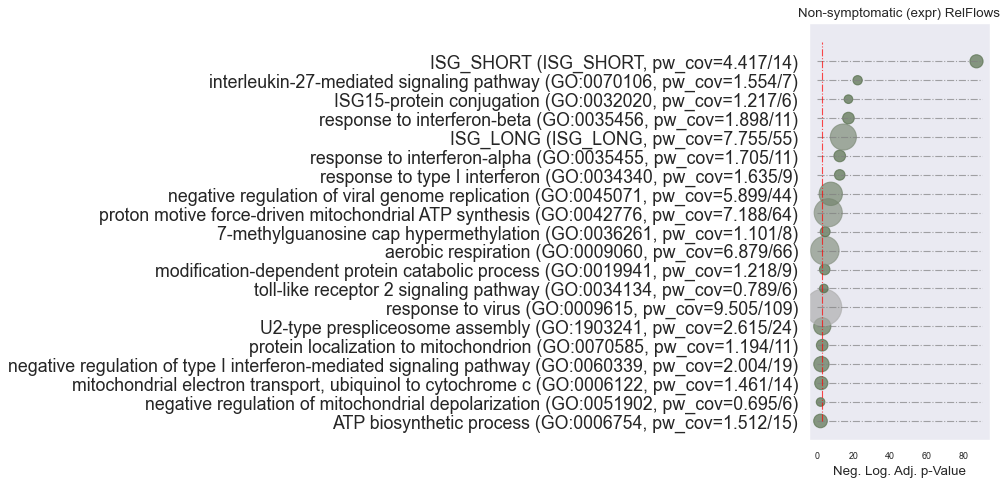

In [53]:
selPWsGrpGO = pwScoresGrpGO[(pwScoresGrpGO["pw_coverage_adj_pval"] < 1) & (pwScoresGrpGO["pwGenes"] > 5)].sort_values("pw_coverage_adj_pval", ascending=True).head(20)
display(selPWsGrpGO)
fa.plotORAresult(selPWsGrpGO, "Non-symptomatic (expr) RelFlows", numResults=20, figsize=(6,6), outfile="plots/asympt_go")

In [54]:
go=fa.get_pathways("go_human.bp.gmt")

Loading pathways from go_human.bp.gmt
Identified 12535 pathways


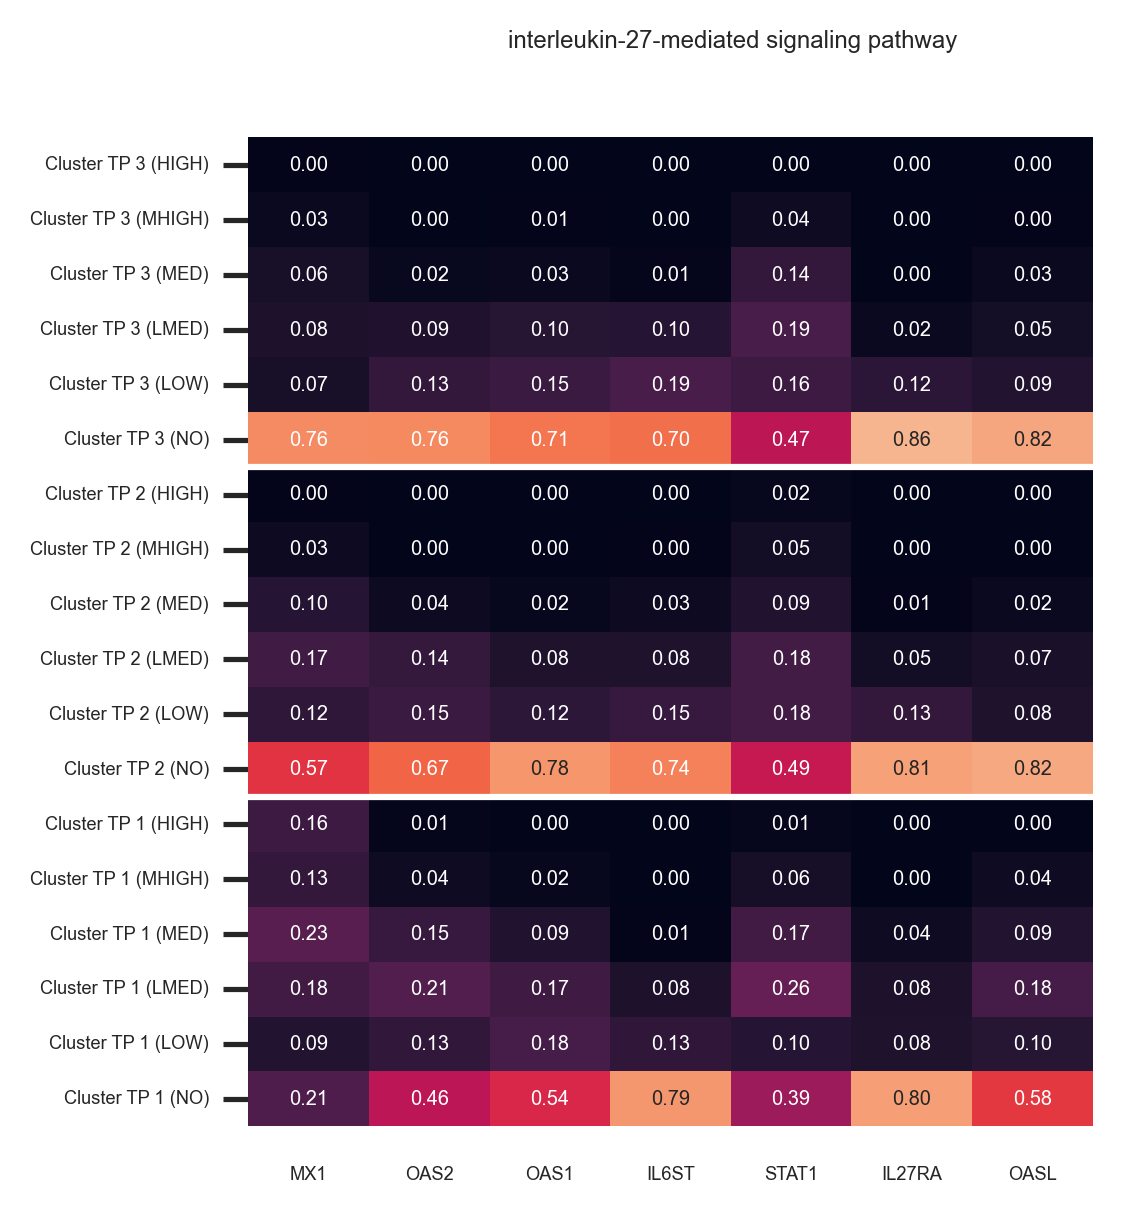

In [65]:
_=fa.plot_state_memberships(go["GO:0070106"][1], name=go["GO:0070106"][0], figsize=(4,4), outfile="plots/GO_0070106_memberships")

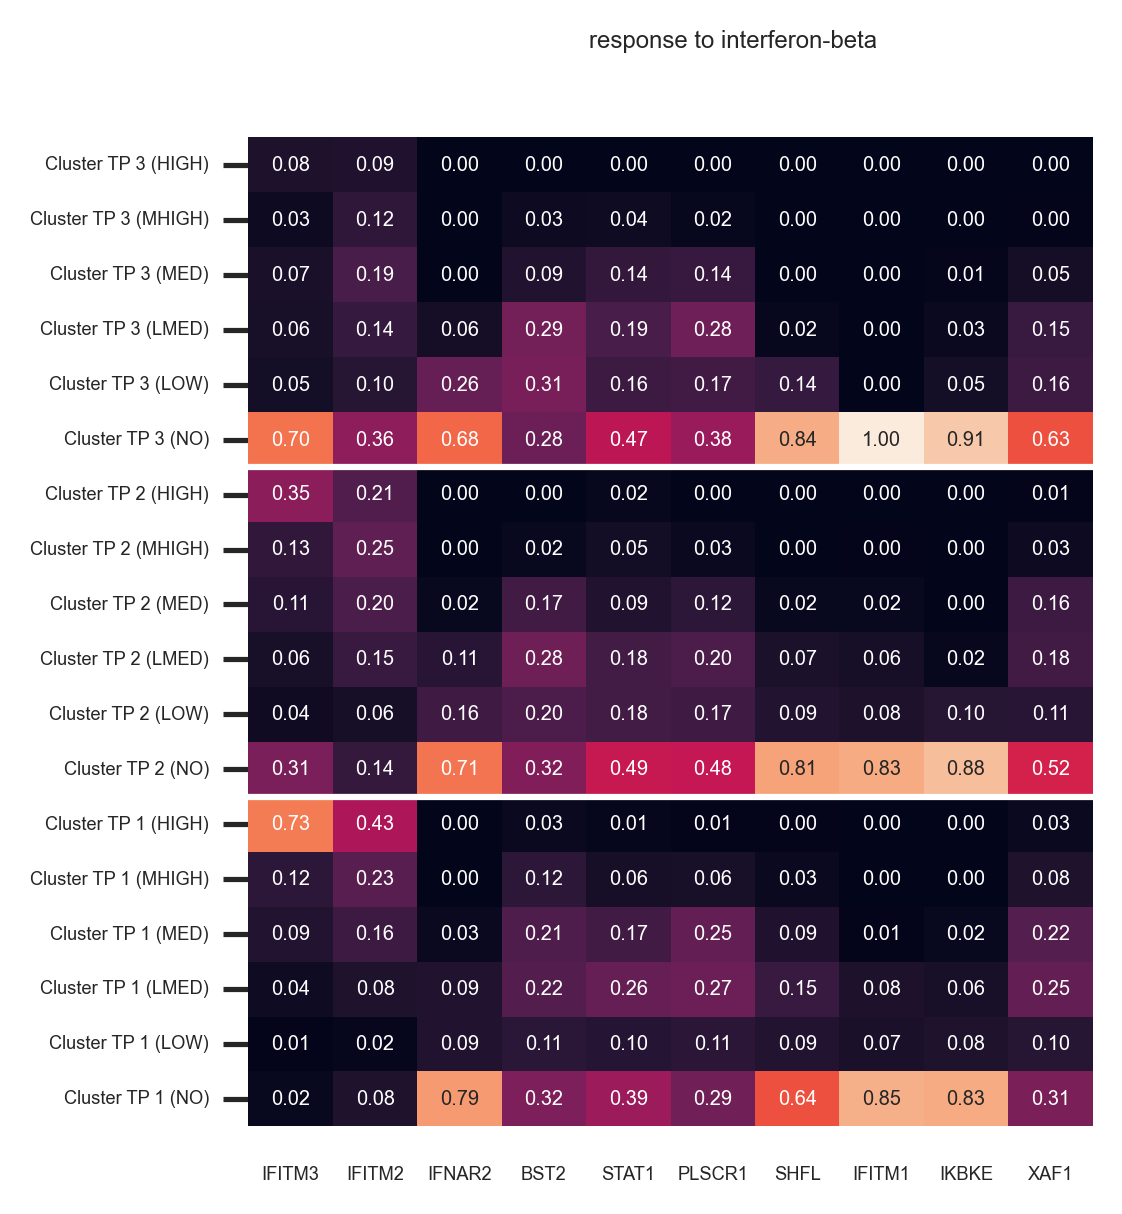

In [64]:
fa.plot_state_memberships(go["GO:0035456"][1], name=go["GO:0035456"][0], figsize=(4,4), outfile="plots/GO_0035456_memberships")